In [ ]:
from pathlib import Path

import pandas as pd
from tqdm import tqdm
from pprint import pprint

# For Jupyter

In [ ]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
        return list(Path('argument').glob('**/*.csv'))

    def setup_without_context(self):
        files = self.get_argument_files()
        frames = list()

        for file_path in tqdm(files):
            df = pd.read_csv(file_path)
            df['label'] = df['label'].str.strip()
            df['label'].replace('_', 'NO LABEL', inplace=True)
            df['label'].replace('Missing', 'NO LABEL', inplace=True)
            df['label'] = df['label'].str.strip().str.upper()

            frames.append(df)

        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'y': data['label'].tolist(),
                'df': data}
    

# ------------------------------------------------
## For google colab

In [ ]:
## Mount Google Drive to Collaboratory

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Colab Notebooks/dataset/argument'    
# all_files = glob.glob(path + "/*.csv")

In [ ]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
        # return list(Path('argument').glob('**/*.csv'))
        return list(Path(path).glob('**/*.csv'))

    def setup_without_context(self):
        files = self.get_argument_files()
        frames = list()

        for file_path in tqdm(files):
            df = pd.read_csv(file_path)
            df['label'] = df['label'].str.strip()
            df['label'].replace('_', 'NO LABEL', inplace=True)
            df['label'].replace('Missing', 'NO LABEL', inplace=True)
            df['label'] = df['label'].str.strip().str.upper()

            frames.append(df)

        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'y': data['label'].tolist(),
                'df': data}
    

# ------------------------------------------------

In [ ]:
if __name__ == "__main__":
    parser = ArgumentParser()    # In the ArgumentParser class

    swc_doc = parser.setup_without_context()  # use setup_without_context function
    pprint(swc_doc['X'][:5]) 
    # print('\n')
    pprint(swc_doc['y'][:5])
    print('\n')
    print(swc_doc['df']['label'].value_counts())
    print('\n')
    print(swc_doc['df'])
    # swc_doc = parser.setup_with_context()
    # print(swc_doc['X'][:5])
    # print(swc_doc['y'][:5])
    # print(swc_doc['df']['label'].value_counts())

100%|██████████| 889/889 [04:02<00:00,  3.67it/s]

['\ufeffThe roles of victim and offender alcohol use in sexual assaults: '
 'results from the National Violence Against Women Survey.',
 'OBJECTIVE',
 'The roles of victim and offender alcohol use in the outcomes of sexual '
 'assault incidents (rape completion, injury and medical care) were studied.',
 'METHOD',
 'Data from 859 female sexual assault victims identified from the National '
 'Violence against Women Survey were examined.']
['NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL']


NO LABEL    8588
EVIDENCE    1486
CLAIM        990
Name: label, dtype: int64


          label                                           sentence
0      NO LABEL  ﻿The roles of victim and offender alcohol use ...
1      NO LABEL                                          OBJECTIVE
2      NO LABEL  The roles of victim and offender alcohol use i...
3      NO LABEL                                             METHOD
4      NO LABEL  Data from 859 female sexual assault victims id...
...         ...

# ----------------------------------------------------------

## Rename variables

In [ ]:
X = swc_doc['X']
y = swc_doc['y']
df = swc_doc['df']

We create a plot to see the distribution of each label in the collection of our documents.

In [ ]:
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
plot_distribution(df['label'])

### Now we will see the number of evidences in each document

In [ ]:
# files4 = list(Path('argument').glob('**/*.csv'))  # jupyter
files4 = list(Path(path).glob('**/*.csv'))          # google colab
print(len(files4),'Documents')

889 Documents


In [ ]:
import pandas as pd
df67 = pd.DataFrame(data=files4, columns = ['filename'])
df67[0:3]

,filename
0,/content/gdrive/My Drive/Colab Notebooks/datas...
1,/content/gdrive/My Drive/Colab Notebooks/datas...
2,/content/gdrive/My Drive/Colab Notebooks/datas...


In [ ]:
count17=[]

for file_path in files4:
        df4 = pd.read_csv(file_path)
        df4['label'] = df4['label'].str.strip()
        df4['label'].replace('_', 'NO LABEL', inplace=True)
        df4['label'].replace('Missing', 'NO LABEL', inplace=True)
        df4['label'] = df4['label'].str.strip().str.upper()

        temp = (df4.label == 'EVIDENCE').sum()
        # df4[df4.label == 'EVIDENCE'].shape[0]
        # if count >=1:
        count17.append(temp)

In [ ]:
pd.set_option('display.max_colwidth', None)  # to display all the text (non-truncated)

df67['evidence_counts'] = count17
df67['evidence_counts'] = df67['evidence_counts'].astype(str) + ' Evidence(-s)'
df67[0:5]

,filename,evidence_counts
0,/content/gdrive/My Drive/Colab Notebooks/dataset/argument/DJK_G4B3_CorpusID_37816793.csv,1 Evidence(-s)
1,/content/gdrive/My Drive/Colab Notebooks/dataset/argument/ABC_G1B2_10.1016_j.rser.2020.109927.csv,1 Evidence(-s)
2,/content/gdrive/My Drive/Colab Notebooks/dataset/argument/LNS_G5B1_10.17615_4624-sp15.csv,1 Evidence(-s)
3,/content/gdrive/My Drive/Colab Notebooks/dataset/argument/EIK_G4B1_CorpusID_18466795.csv,1 Evidence(-s)
4,/content/gdrive/My Drive/Colab Notebooks/dataset/argument/ABC_G1B1_Corpus ID 134198555.csv,1 Evidence(-s)


In [ ]:
plot_distribution(df67['evidence_counts'])

# -------------------------------------------------------------
## Path (get_argument_files)

In [ ]:
## The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, 
## although results are returned in arbitrary order.

In [ ]:
## Path instantiates a concrete path for the platform the code is running on.

In [ ]:
## Listing subdirectories:

p = Path('.')
[x for x in p.iterdir() if x.is_dir()]
# [PosixPath('.hg'), PosixPath('docs'), PosixPath('dist'),
#  PosixPath('__pycache__'), PosixPath('build')]

[PosixPath('.config'), PosixPath('gdrive'), PosixPath('sample_data')]

In [ ]:
list(Path('argument').glob('**/*.csv'))[:10]

# p = Path('.')
# list(p.glob('**/*.py')): Listing Python source files in this directory tree:

[]

## <ins>Explanation of def setup_without_context</ins>

tqdm: make your loops show a progress meter
library that we can use to show a progress bar

str(): converts the specified value into a string
strip(): Remove spaces at the beginning and at the end of the string
replace the '_' symbol or any 'Missing' values with 'NO LABEL' in the same data frame
Remove all spaces and convert all labels to upper case

Then we store multiple dataframes in the 'frames' list  (frames.append(df))

**Concatenate a list of pandas dataframes together**
I have a list of Pandas dataframes that I would like to combine into one Pandas dataframe.
Given that all the dataframes have the same columns, you can simply concat them.

We also reset the index of the dataframe and use the default one (e.g. [0,1,2,3,4])

**Import multiple csv files into pandas and concatenate into one DataFrame**

If you have same columns in all your csv files then you can try the code below. 

We set as 'X' a list with all the sentences as 'y' a list with all the labels and as 'df' the dataframe with the whole data (both label and sentence)

Print the first 5 (paper) elements of the X and y variables
Count the unique labels in descending order
Print the whole dataset (with all the papers)



# =======================================================

Sentence tokenization is the process of splitting text into individual sentences
Our sentences are already tokenized in this data fortmat,in different rows

In [ ]:
X[:1]

['\ufeffThe roles of victim and offender alcohol use in sexual assaults: results from the National Violence Against Women Survey.']

In [ ]:
print(df["sentence"][2])

The roles of victim and offender alcohol use in the outcomes of sexual assault incidents (rape completion, injury and medical care) were studied.


In [ ]:
'''
Convert to lower case
'''

df['sentence']=df['sentence'].str.lower()

In [ ]:
'''
Data Cleaning
'''
import re

# Replace any non-letter, space, or digit character in the headlines.
## remove all special characters, punctuation and spaces from a string so that I only have letters and numbers.

#df['sentence'] = [re.sub(r'\W+',' ',h) for h in df['sentence']] ## \W matches any non-word character (equal to [^a-zA-Z0-9_])
df['sentence'] = [re.sub(r'\d+','',h) for h in df['sentence']] ## \d matches a digit (equal to [0-9])

# Replace sequences of whitespace with a space character.
df['sentence'] = [re.sub(r'\s+',' ', h) for h in df['sentence']] ## \s matches any whitespace character (equal to [\r\n\t\f\v ])
## 1 space mono, oxi parapanw -> gia osa afaire8ikan auto sto telos!!!


# remove punctiation symbols
# Removing punctuations in string 
# Using regex 
df['sentence'] = [re.sub(r'[^\w+\s+]', '', h) for h in df['sentence']]

print(df["sentence"])

0        the roles of victim and offender alcohol use i...
1                                                objective
2        the roles of victim and offender alcohol use i...
3                                                   method
4        data from female sexual assault victims identi...
                               ...                        
11059     two themes and six subthemes arose from the data
11060    the themes were the practice of fgmc and the a...
11061    conclusions fgmc is still widely practiced in ...
11062    studies investigating the experiences of all t...
11063    understanding these phenomena could guide effo...
Name: sentence, Length: 11064, dtype: object


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
'''
word tokenization
'''

import nltk

df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['sentence']), axis=1)

print(df['tokens'][0])

['the', 'roles', 'of', 'victim', 'and', 'offender', 'alcohol', 'use', 'in', 'sexual', 'assaults', 'results', 'from', 'the', 'national', 'violence', 'against', 'women', 'survey']


In [ ]:
'''
Removing stopwords
'''

# download stopwords
nltk.download(u'stopwords')

from nltk.corpus import stopwords
# there are also some english stopwords in the Scikit-learn package.
en_stop = stopwords.words('english')


# import stop words from sk learn to enrich the stop words from ntlk
from sklearn.feature_extraction import stop_words 
sk_stop=list(stop_words.ENGLISH_STOP_WORDS)


# combine sklearn and nltk stopwords 
all_stopwords= set(en_stop + sk_stop)



# remove stopwords from sentences to strings 
cleaned_text= df['tokens'].apply(lambda x: [item for item in x if item not in all_stopwords])


print(cleaned_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0        [roles, victim, offender, alcohol, use, sexual...
1                                              [objective]
2        [roles, victim, offender, alcohol, use, outcom...
3                                                 [method]
4        [data, female, sexual, assault, victims, ident...
                               ...                        
11059                     [themes, subthemes, arose, data]
11060        [themes, practice, fgmc, attempts, end, fgmc]
11061    [conclusions, fgmc, widely, practiced, africa,...
11062    [studies, investigating, experiences, role, pl...
11063    [understanding, phenomena, guide, efforts, cur...
Name: tokens, Length: 11064, dtype: object


In [ ]:
clean_textdf2 = pd.DataFrame(cleaned_text) 
print(clean_textdf2["tokens"])

0        [roles, victim, offender, alcohol, use, sexual...
1                                              [objective]
2        [roles, victim, offender, alcohol, use, outcom...
3                                                 [method]
4        [data, female, sexual, assault, victims, ident...
                               ...                        
11059                     [themes, subthemes, arose, data]
11060        [themes, practice, fgmc, attempts, end, fgmc]
11061    [conclusions, fgmc, widely, practiced, africa,...
11062    [studies, investigating, experiences, role, pl...
11063    [understanding, phenomena, guide, efforts, cur...
Name: tokens, Length: 11064, dtype: object


In [ ]:
print(clean_textdf2["tokens"][0])

['roles', 'victim', 'offender', 'alcohol', 'use', 'sexual', 'assaults', 'results', 'national', 'violence', 'women', 'survey']


In [ ]:
# nltk.download('wordnet')
from nltk.stem import  WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(clean_textdf2["tokens"][0][len(clean_textdf2["tokens"][0])-1])
print(lemmatizer.lemmatize(clean_textdf2["tokens"][0][len(clean_textdf2["tokens"][0])-1]))

survey
survey


In [ ]:
## lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun”

In [ ]:
'''
Lemmatization
'''
# Diafora apo stemming: anti na kopsei, paei na brei to root/riza (to rima) tis leksis
# px: are,is => einai apo to rima 'be' (den mas noiazoun oi xronoi klp)

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

check = clean_textdf2["tokens"].apply(lambda sentence:[lemmatizer.lemmatize(w) for w in sentence])
print(type(check))
clean_textdf2 = pd.DataFrame(check) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<class 'pandas.core.series.Series'>


In [ ]:
# some basic description 
df.describe().T

,count,unique,top,freq
label,11064,3,NO LABEL,8588
sentence,11064,10337,abstract,201
tokens,11064,10336,[abstract],201


In [ ]:
print(df['label'].value_counts())

NO LABEL    8588
EVIDENCE    1486
CLAIM        990
Name: label, dtype: int64


### Splitting Dataset Procedure

---
**NOTE:**

Usually we split the data in **3 smaller datasets**
* Training dataset
* Validation dataset
* Test dataset (unseen dataset)

---

For this project we split the data set to 2 sets (train and validation)
in order to measure the accuracy of our models.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# splitting in train-validation-test sets in a stratified manner.
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# sss: stratified shuffle split

# We will use this object to split the raw dataset in Train - Test in a stratified manner.
# initialize the test and test object 
test_sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

test_sss

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)

In [ ]:
# Only integer scalar arrays can be converted to a scalar index
# We first convert X and y lists to dataframes, because we cannot use indexing on a list

In [ ]:
# Creating a dataframe object from list
x = pd.DataFrame(clean_textdf2) 
y = pd.DataFrame(df["label"]) 
x.head(5)

,tokens
0,"[role, victim, offender, alcohol, use, sexual,..."
1,[objective]
2,"[role, victim, offender, alcohol, use, outcome..."
3,[method]
4,"[data, female, sexual, assault, victim, identi..."


In [ ]:
print(y.head())

      label
0  NO LABEL
1  NO LABEL
2  NO LABEL
3  NO LABEL
4  NO LABEL


In [ ]:
# splitting in train and test

x_train, x_test, y_train, y_test = None, None, None, None

# getting the indexes for each dataset
for train_index, test_index in test_sss.split(x, y):
    
    #print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# check here the indexes. 
x_train.head()

,tokens
9692,"[conclusion, order, prevent, depression, impro..."
5472,"[according, hacker, hatemij, test, result, eco..."
5541,"[implication, energy, policy, derived, relatio..."
1878,"[included, rigorously, evaluated, health, prog..."
6338,"[change, policy, norm, needed, protect, childr..."


In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print()


print()
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (8851, 1)
y_train shape: (8851, 1)


x_test shape: (2213, 1)
y_test shape: (2213, 1)


In [ ]:
# !pip install tensorflow

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

# **Tokenization**
We will count the max words in the training data only.

In [ ]:
# !pip install pydot
# !pip install graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
# import pydot

In [ ]:
clean_textdf = pd.DataFrame(clean_textdf2) 
print(clean_textdf["tokens"])

0        [role, victim, offender, alcohol, use, sexual,...
1                                              [objective]
2        [role, victim, offender, alcohol, use, outcome...
3                                                 [method]
4        [data, female, sexual, assault, victim, identi...
                               ...                        
11059                      [theme, subthemes, arose, data]
11060          [theme, practice, fgmc, attempt, end, fgmc]
11061    [conclusion, fgmc, widely, practiced, africa, ...
11062    [study, investigating, experience, role, playe...
11063    [understanding, phenomenon, guide, effort, cur...
Name: tokens, Length: 11064, dtype: object


In [ ]:
from collections import Counter
# because we had all words in different list, we decided to merge all lists in one single list
# then we use Counter to Count the frequency of each word

# Finding the max words
## 1st way 

In [ ]:
count=len(np.unique(x_train))
print(count)

8285


## 2nd way

In [ ]:
x_train_df = pd.DataFrame(x_train) 
print(x_train_df["tokens"])

9692    [conclusion, order, prevent, depression, impro...
5472    [according, hacker, hatemij, test, result, eco...
5541    [implication, energy, policy, derived, relatio...
1878    [included, rigorously, evaluated, health, prog...
6338    [change, policy, norm, needed, protect, childr...
                              ...                        
414     [special, focus, given, perception, gender, eq...
5296    [using, combined, dataset, global, national, b...
8478    [tool, assessing, environmental, impact, based...
542     [predicting, gender, effect, phase, technologi...
728     [background, research, evidence, suggests, men...
Name: tokens, Length: 8851, dtype: object


In [ ]:
print(x_train_df["tokens"].iloc[0])

['conclusion', 'order', 'prevent', 'depression', 'improve', 'psychosocial', 'wellbeing', 'clinical', 'nurse', 'organizational', 'support', 'health', 'management', 'need', 'focused', 'highrisk', 'nurse']


In [ ]:
# replace ',' with space ' '
a4 = " ".join(x_train['tokens'].iloc[0]).split(",")
a4

['conclusion order prevent depression improve psychosocial wellbeing clinical nurse organizational support health management need focused highrisk nurse']

In [ ]:
# replace ',' with space ' '
a45 = x_train.apply(lambda row: " ".join(row['tokens']).split(","), axis=1)
a45.iloc[0]

['conclusion order prevent depression improve psychosocial wellbeing clinical nurse organizational support health management need focused highrisk nurse']

In [ ]:
a89=[]
for i in a45:
    a89.extend(i)

In [ ]:
len(Counter(a89))

8285

## 3rd way

In [ ]:
len(set(a89))

8285

In [ ]:
# find total number of words used 
max_words=len(Counter(a89))
print(max_words)

8285


## Synopsis for max words in x_train

In [ ]:
max_words=len(np.unique(x_train))
print(max_words)

temp_90=0.9*max_words
print(temp_90) 

# given that 90% of max_words is 7461.900000000001 we round it and keep 7500

max_words=7500

8285
7456.5


In [ ]:
import os
from glob import glob
from typing import Tuple, List
import pandas as pd
import numpy as np
from tensorflow.python.keras.layers import Embedding, Flatten, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from ipywidgets import interact

## Keras Tokenizer
First we try with the maximum number of words in the training dataset (num_words=None)

* num_words=None (default): the maximum number of words to keep, based on word frequency. Only the most common `num_words-1` words will be kept.
* oov_token: if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
* split: str. Separator for word splitting.

In [ ]:
'''
Keras Tokenizer
'''    
#tokenizer = Tokenizer(num_words=max_words)
# Setting up Keras tokenizer
# We will only consider max_words most used words in this dataset

# Setting up Keras tokenizer
tokenizer0 = Tokenizer(num_words=None, lower=True, oov_token='<OOV>', split=',')
tokenizer0

In [ ]:
'''
Tokenization and Padding
'''

tokenizer0.fit_on_texts(x_train["tokens"])  # Generate tokens by counting frequency

sequences = tokenizer0.texts_to_sequences(x_train["tokens"])

word_index = tokenizer0.word_index

print('Max words in x_train =',count) 
print(len(tokenizer0.word_index))

Max words in x_train = 8285
10701


We will now use the rounded version of the 90% of the total max words in x_train

In [ ]:
'''
Keras Tokenizer
'''    
#tokenizer = Tokenizer(num_words=max_words)
# Setting up Keras tokenizer
# We will only consider max_words most used words in this dataset

# Setting up Keras tokenizer
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='<OOV>', split=',')
tokenizer

In [ ]:
'''
Tokenization and Padding
'''

# this is like the .fit() that we call using Scikit-learn and Count-Vectorizer
tokenizer.fit_on_texts(x_train["tokens"])  # Generate tokens by counting frequency


# this is like the .transform() that we call using Scikit-learn and Count-Vectorizer.
# The major difference is that it turns text into sequence of numbers. NOT one-hot-encoding
# sequences: array of numbers like a dictionary e.g. 28 links to a word such us "movie"
sequences = tokenizer.texts_to_sequences(x_train["tokens"])
#print(sequences)


# The tokenizers word index is a dictionary that maps each word to a number.
word_index = tokenizer.word_index

print('Token for the word "depression": {}'.format(word_index['depression']))

Token for the word "depression": 398


In [ ]:
print(max_words) 
print(len(tokenizer.word_index))
print(len(x_train))

7500
10701
8851


We also created a histogram and computer the quantiles, in order to get a gist of the number of words in the documents.

In [ ]:
# find the maximum number of words in a sentence
wordsintrain=[]
for i in x_train["tokens"]:
    wordsintrain.append(len(i))

# convert wordsintrain to data frame to see important metrics for number of words
words_df = pd.DataFrame(wordsintrain) 
words_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8851.0,12.42933,6.795068,0.0,8.0,12.0,16.0,107.0


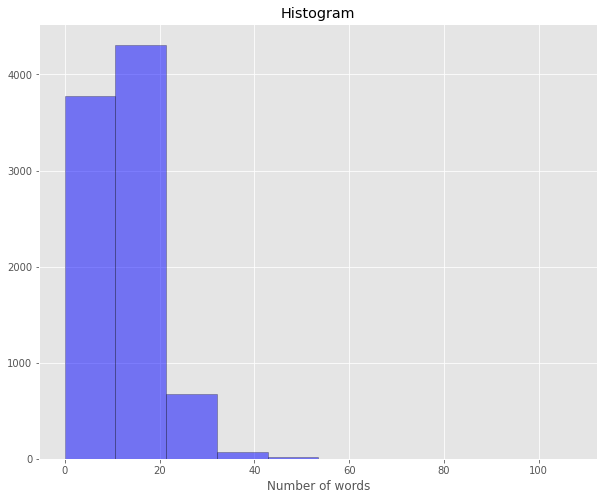

In [ ]:
#### histogram ####

plt.style.use('ggplot')

words_df.hist(color='blue', edgecolor='black', alpha=0.5, figsize=(10, 8))

plt.xlabel('Number of words')

plt.title("Histogram")

plt.show()

In [ ]:
# You can call `quantile(i)` to get the i'th quantile,
# where `i` should be a fractional number.
print(words_df.quantile(0.5))
# 12
print(words_df.quantile(0.9)) # 90th percentile
# 21
print(words_df.quantile(0.95))# 95th percentile
# 25
print(words_df.quantile(0.96))# 96th percentile
print(words_df.quantile(0.97))# 97th percentile
print(words_df.quantile(0.98))# 98th percentile
print(words_df.quantile(0.99))# 99th percentile
print(words_df.quantile(0.999999999999))
# 107

# judging from the quantiles we will take the 98th quantile
# we will use as max length in padding 33

0    12.0
Name: 0.5, dtype: float64
0    21.0
Name: 0.9, dtype: float64
0    24.0
Name: 0.95, dtype: float64
0    25.0
Name: 0.96, dtype: float64
0    27.0
Name: 0.97, dtype: float64
0    29.0
Name: 0.98, dtype: float64
0    33.0
Name: 0.99, dtype: float64
0    107.0
Name: 0.999999999999, dtype: float64


In [ ]:
### Padding Arguments

## By default in pad_sequences: dtype='int32', padding='pre', truncating='pre',value=0.0

# sequences	  List of sequences (each sequence is a list of integers).
# maxlen	    Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.
# dtype	     (Optional, defaults to int32). Type of the output sequences. To pad sequences with variable length strings, you can use object.
# padding	    String, 'pre' or 'post' (optional, defaults to 'pre'): pad either before or after each sequence.
# truncating	String, 'pre' or 'post' (optional, defaults to 'pre'): remove values from sequences larger than maxlen, either at the beginning or at the end of the sequences.
# value	      Float or String, padding value. (Optional, defaults to 0.)

## Pre-padding

In [ ]:
#### x train ####

# To proceed, we now have to make sure that all text sequences we feed into the model
# have the same length.

# We can do this with Keras pad sequences tool.
# It cuts of sequences that are too long and adds zeros to sequences that are too short.

# Make all sequences 33 words long
maxlen = 33

# pad_sequences is used to ensure that all sequences in a list have the same length. 
# By default this is done by padding 0 in the beginning of each sequence 
# until each sequence has the same length as the longest sequence.
data = pad_sequences(sequences, maxlen=maxlen)

# We have 8851, 33 word sequences now
print('New data shape: {}'.format(data.shape))
print(data)
x_train2=data

New data shape: (8851, 33)
[[   0    0    0 ...  626 1864  760]
 [   0    0    0 ... 1277   12  163]
 [   0    0    0 ...   82   39    6]
 ...
 [   0    0    0 ...  288   56  564]
 [   0    0    0 ... 1197    5  971]
 [   0    0    0 ...  839    1  210]]


In [ ]:
#### transform x_test with tokenizer ####

x_test2 = tokenizer.texts_to_sequences(x_test["tokens"])
x_test2 = pad_sequences(x_test2, maxlen=maxlen)
print('New data shape: {}'.format(x_test2.shape))
print(x_test2)

New data shape: (2213, 33)
[[   0    0    0 ... 1161  469 2256]
 [   0    0    0 ...   28   10   86]
 [   0    0    0 ... 2113  351  137]
 ...
 [   0    0    0 ... 4223 5308 2675]
 [   0    0    0 ... 1194  202 2245]
 [   0    0    0 ... 4737   31  722]]


## Post-padding

In [ ]:
'''
# apply post padding to x_train
data_post = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post' )

# We have 25K, 100 word sequences now
print('New data shape: {}'.format(data_post.shape))
print(data_post)
x_train2_post=data_post
'''

New data shape: (8851, 33)
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
'''
###### transform x_test with tokenizer ######
sequences2 = tokenizer.texts_to_sequences(x_test["tokens"])

# apply pre padding to x_test
x_test2 = pad_sequences(sequences2, maxlen=maxlen)
print(x_test2)
'''

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 2]
 [0 0 0 ... 1 1 1]]


In [ ]:
'''
# apply post padding to x_test
x_test2_post=pad_sequences(sequences2, maxlen=maxlen, padding='post', truncating='post' )
print(x_test2_post)
'''

[[5 6 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 4 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


We also applied post-padding, but we decided to continue our analysis using pre-padding from now.

# Label Encoding για τα y επειδη εχουμε multiclass classification

### Labels Encoding 
one hot encoding also explained [here](https://medium.com/hackernoon/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
### Conversion of the Y labels to One-Hot-Encoding

y_train[0:4]

,label
9692,CLAIM
5472,EVIDENCE
5541,NO LABEL
1878,NO LABEL


In [ ]:
print(y_train.label.unique())
print(y_train.label.nunique())

['CLAIM' 'EVIDENCE' 'NO LABEL']
3


In [ ]:
# keras only supports one-hot-encoding for data that has already been integer-encoded. 
# You can integer-encode your strings like so:

# Using scikit-learn
from sklearn.preprocessing import LabelEncoder
import numpy as np

y_train_temp = np.array(y_train)
y_test_temp = np.array(y_test)

y_train_new = LabelEncoder().fit_transform(y_train_temp)
y_test_new = LabelEncoder().fit_transform(y_test_temp)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print(y_train_temp)
print('\n',y_train_new)

[['CLAIM']
 ['EVIDENCE']
 ['NO LABEL']
 ...
 ['NO LABEL']
 ['NO LABEL']
 ['NO LABEL']]

 [0 1 2 ... 2 2 2]


In [ ]:
# checking out the number of classes on our dataset.
print('Classes: ')
print(set(y_train['label'])) 

# print the number of total distinct classes
print(np.max(y_train_new)+1, 'classes')

Classes: 
{'EVIDENCE', 'NO LABEL', 'CLAIM'}
3 classes


In [ ]:
dict2 = pd.Series(y_train_new,index=y_train_temp).to_dict()
sort_dict = sorted(dict2.items(), key=lambda x: x[1])
sort_dict

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]

### Convert the Binary classification output to Categorical classification.

to_categorical() function converts the labels to one_hot_encoding.

In [ ]:
# You can now feed this into keras.utils.to_categorical:

from tensorflow.keras.utils import to_categorical

print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')

# pre-proccessing parameters
num_classes = 3

# to_categorical() function converts the labels to one_hot_encoding!!!!
# convert class vectors to binary class matrices

y_train_one_hot = to_categorical(y_train_new, num_classes)   
y_test_one_hot = to_categorical(y_test_new, num_classes)

y_train_one_hot

Convert class vector to binary class matrix (for use with categorical_crossentropy)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
print('y_train shape: {}'.format(y_train.shape))
print('y_train shape after One-hot Encoding: {}'.format(y_train_one_hot.shape))
print('\n y_test shape: {}'.format(y_test.shape))
print('y_test shape after One-hot Encoding: {}'.format(y_test_one_hot.shape))

y_train shape: (8851, 1)
y_train shape after One-hot Encoding: (8851, 3)

 y_test shape: (2213, 1)
y_test shape after One-hot Encoding: (2213, 3)


In [ ]:
y_train = y_train_one_hot
y_test = y_test_one_hot

In [ ]:
print(y_train)
print(y_train.sum(axis=1))   # sum ana row: exw ola 0 kai enan 1 ana row => opote sum=1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[1. 1. 1. ... 1. 1. 1.]


# Convolutional Networks for Text Classification

In [ ]:
import numpy as np

from tensorflow.python import keras

from tensorflow.python.keras.preprocessing import sequence

from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

from tensorflow.python.keras.datasets import imdb

### Using Pre-trained Word Embeddings

#### Glove Embeddings

* https://nlp.stanford.edu/projects/glove/
* We will use the following small pretrained-embedding dataset
* http://nlp.stanford.edu/data/glove.6B.zip

After downloading the GloVe embeddings from the GloVe website we can load them into our model

In [ ]:
'''
Using Pre-trained Word Embeddings6
'''
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-10-18 11:50:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-18 11:50:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-18 11:50:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Function that loads glove embeddings.

We load the glove embeddings as a directory of words to vectors. 

In [ ]:
def load_glove_embeddings(dim: int = 100) -> dict:
    """
    Function that loads glove embeddings. 

    :param dim: The embeddings size (dimensions)
    :return:
    """
    print('Loading word vectors')

    embed_index = dict()  # We create a dictionary of word -> embedding

    fname = 'glove.6B.{}d.txt'.format(dim)

    f = open(fname)  # Open file

    # In the dataset, each line represents a new word embedding
    # The line starts with the word and the embedding values follow
    for line in tqdm(f, desc='Loading Embeddings', unit='word'):
        values = line.split()
        # The first value is the word, the rest are the values of the embedding
        word = values[0]
        # Load embedding
        embedding = np.asarray(values[1:], dtype='float32')

        # Add embedding to our embedding dictionary
        embed_index[word] = embedding
    f.close()

    print('Found %s word vectors.' % len(embed_index))

    return embed_index

In [ ]:
embedding_dims = 300 

embeddings_index = load_glove_embeddings(dim=embedding_dims)

Loading Embeddings: 2407word [00:00, 12200.30word/s]

Loading word vectors


Loading Embeddings: 400000word [00:33, 11938.25word/s]

Found 400000 word vectors.


### Comments:

* This **embedding matrix** can be used **as weights** for the **embedding** layer.
* This way, the **embedding layer** uses the **pre-trained GloVe weights** instead of random ones.
* We can also set the embedding layer to **NOT trainable**. This means, Keras won't change the  weights of the embeddings while training which makes sense since our embeddings are already trained.

* Not all words that are in our IMDB vocabulary might be in the GloVe embedding though.
* For missing words it is wise to use **random embeddings** with the **same mean** and **standard deviation** as the GloVe embeddings

In [ ]:
def create_embeddings_matrix(emb_index: dict,
                             tokenizer: Tokenizer,
                             emb_dim: int = 100) -> np.ndarray:
    """

    :param emb_index: Embeddings Index
    :param tokenizer: Keras fitted tokenizer.
    :param emb_dim: Embeddings dimension.
    :return: A matrix of shape (nb_words, emb_dim) containing the globe embeddings.
    """
    assert emb_dim in [50, 100, 200, 300]

    # Create a matrix of all embeddings
    # (stacking=concatenating all the vectors)
    all_embs = np.stack(emb_index.values())  # .values() gets the all the arrays from the keys

    # Calculate mean
    emb_mean = all_embs.mean()
    # Calculate standard deviation
    emb_std = all_embs.std()

    print("Embeddings AVG: {} | STD: {}".format(emb_mean, emb_std))

    # We can now create an embedding matrix holding all word vectors.

    word_index = tokenizer.word_index

    # How many words are there actually. Because we may have requested X most common tokens
    # and the total tokens are X/2
    nb_words = min(max_words2, len(word_index))

    # Create a random matrix with the same mean and std as the embeddings

    embedding_matrix = np.random.normal(emb_mean,  # mean
                                        emb_std,  # std
                                        (nb_words, emb_dim)) # shape of the matrix

    # The vectors need to be in the same position as their index.
    # Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on
    
    counter = 0
    
    # Loop over all words in the word index
    for word, i in word_index.items():  # .items() return a tuple with (word, word_index)

        # If we are above the amount of words we want to use we do nothing
        if i >= max_words2:
            continue

        # Get the embedding vector for the word
        embedding_vector = emb_index.get(word)

        # If there is an embedding vector, put it in the embedding matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            counter += 1
   
    print(f'Found {counter} pre-trained embeddings out of {nb_words}')
    
    return embedding_matrix

In [ ]:
print('x_train max words =', max_words)
print(len(tokenizer.word_index))

x_train max words = 7500
10701


In [ ]:
max_words2 = max_words
max_words2

7500

In [ ]:
embedding_matrix = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=tokenizer,
                                            emb_dim=embedding_dims)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 6536 pre-trained embeddings out of 7500


In [ ]:
print(embedding_matrix.shape,'\n')
print(embedding_matrix)

(7500, 300) 

[[-0.27236103 -0.19108025 -0.12676416 ... -0.00141906 -0.2092597
   0.18456379]
 [-0.31981125  0.080478   -0.20508978 ...  0.23281692  0.41639861
  -0.34766847]
 [-0.12675001  0.097588    0.024441   ... -0.64100999 -0.23461001
  -0.18814   ]
 ...
 [-0.1523      0.10892     0.020162   ... -0.18626    -0.21059
  -0.035407  ]
 [-0.40686429 -0.62102087 -0.28295157 ...  0.3301406  -0.05370894
  -0.1373385 ]
 [-0.94512331  0.20746435  0.1810185  ... -0.14670196 -0.31767124
   0.31062597]]


#### Build Model with Pre-Trained Word Embeddings

In [ ]:
def build_model_with_glove_embeddings(maximum_words,
                                      emb_dim,
                                      max_seq_len,
                                      emb_matrix):
    """
    This function builds a Keras model with pre-trained word embeddings

    :param maximum_words: Total number of words to be used by the model
    :param emb_dim: The size of the embeddings vector.
    :param max_seq_len: The sequence length for each text (total number of tokens)
    :param emb_matrix: The pretrained glove embedding matrix to be used as weights.
    :return: a keras sequential model.
    """

    seq_model = Sequential()
    
    seq_model.add(Embedding(input_dim=maximum_words,
                            output_dim=emb_dim,
                            input_length=max_seq_len,
                            weights=[emb_matrix],
                            trainable=False))

    seq_model.add(Flatten())
    seq_model.add(Dense(32, activation='relu'))
    seq_model.add(Dense(1, activation='sigmoid'))

    print(seq_model.summary())

    # Notice that we now have far fewer trainable parameters.
    seq_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['acc'])

    return seq_model

In [ ]:
max_wordsno=len(Counter(a89))
print('max_words =',max_wordsno) 

print('embedding_dims =',embedding_dims)
print('maxlen =',maxlen)

print('tokenizer.word_index= ',len(tokenizer.word_index))


print(max_words2)
print(max_words)

max_words = 8285
embedding_dims = 300
maxlen = 33
tokenizer.word_index=  10701
7500
7500


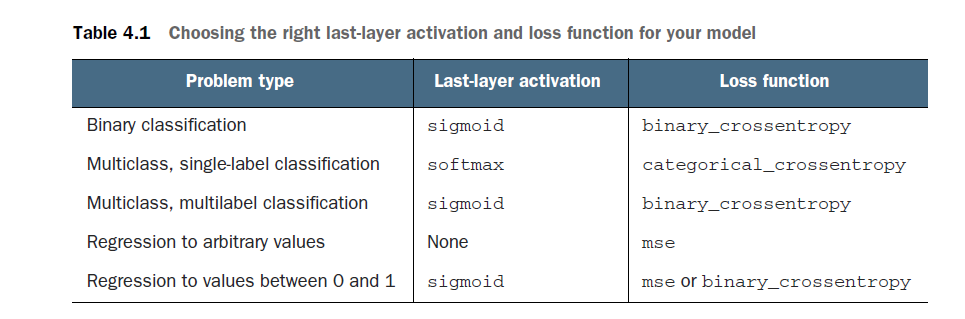


Single-label substrates occur only once in each class; multilabel substrates belong to more than one class.

In our case we have a collection of ducements and we want to classify the sentences based on 3 categories (Evidence, Claim, No label). This means that we have three categories(=classes), but we want to choose only one(=single label) from the three for each document.

So, we have a Multiclass, single-label classification problem. As a result, the last-layer activation function we will use is softmax and the loss function is the categorical crossentropy.

For modern deep learning neural networks, the default activation function is the rectified linea(ReLu) activation function.


In [ ]:
# Now we can turn all data into proper training and validation data.
y_train_ar = np.asarray(y_train)
y_test_ar = np.asarray(y_test)

In [ ]:
print(max_words)
print(max_words2)

7500
7500


In [ ]:
print(embedding_matrix.shape,'\n')
print(max_words)

(7500, 300) 

7500


In [ ]:
print(x_train['tokens'].iloc[0])

['conclusion', 'order', 'prevent', 'depression', 'improve', 'psychosocial', 'wellbeing', 'clinical', 'nurse', 'organizational', 'support', 'health', 'management', 'need', 'focused', 'highrisk', 'nurse']


In [ ]:
'''
Predicting using the fitted model
'''

# Demo on a positive text
my_text = df["sentence"][0]

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:', seq)

seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:', seq)

prediction = model_2.predict(seq)
print('label:', prediction)

raw seq: [[1]]
padded seq: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
label: [[2.4819553e-06 7.2779176e-06 9.9999022e-01]]


In [ ]:
def predict_new_arguement(text: str,
                        tokenizer: Tokenizer,
                        seq_max_length: int,
                        model: Sequential):
    """

    :param text: str. 
    :param tokenizer: The fitted keras tokenizer
    :param seq_max_length: Max tokens to user from sequence
    :param model: Trained keras sequential model
    :return: int. 
    """

    seq = tokenizer.texts_to_sequences([text])
    #print('raw seq:', seq)

    seq = pad_sequences(seq,
                        maxlen=seq_max_length)

    #print('padded seq:', seq)
   

    prediction = model.predict(seq)
    
    #CLAIM:0, EVIDENCE:1, NO LABEL:2
    
    if 0 == np.argmax(prediction):
        return "The argument is a claim"
    elif 1==np.argmax(prediction):
        return "The argument is an Evidence"
    else:
        return "The argument has No Label"

In [ ]:
   '''
    prediction = model.predict(seq)
    print(prediction)

    print('argmax:',np.argmax(prediction))

    prob = 100 * prediction[0][np.argmax(prediction)]

    print('Positivity probability: {} %'.format(round(prob, 3)))

    print(sort_dict[np.argmax(prediction)][0])
    return int(prob > 50.0)
    '''

In [ ]:
# Demo on a negative text
my_text = x_train["tokens"][89]
#my_text = df["sentence"][0]

pred=predict_new_arguement(text=my_text,
                    tokenizer=tokenizer,
                    seq_max_length=maxlen,
                    model=model_2)

print(pred)

The argument is a claim


# <center><ins>**Convolutional neural network (CNN)**</ins></center>

In [ ]:
import numpy as np

from tensorflow.python import keras

from tensorflow.python.keras.preprocessing import sequence

from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

from tensorflow.python.keras.datasets import imdb

In [ ]:
sort_dict

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]

In [ ]:
print('Pad sequences\n')

print('x_train shape: {}'.format(x_train2.shape))   # Pleon exei shape, giati to ekana numpy array -> 34 8eseis mia gia ka8e leksi
print('x_test shape: {}'.format(x_test2.shape))
print('\n')
print('y_Train shape: {}'.format(y_train_ar.shape))
print('y_Test shape: {}'.format(y_test_ar.shape))

Pad sequences

x_train shape: (8851, 33)
x_test shape: (2213, 33)


y_Train shape: (8851, 3)
y_Test shape: (2213, 3)



## Build Text CNN Model

In [ ]:
print('max_words =',max_words,' (vocabulary size kept from x_train)') 
print('maxlen =',maxlen,' (maximum length of tokens to use for each sentence )')
print('tokenizer.word_index= ',len(tokenizer.word_index))

max_words = 7500  (vocabulary size kept from x_train)
maxlen = 33  (maximum length of tokens to use for each sentence )
tokenizer.word_index=  10701



For CONV-1D check: https://keras.io/api/layers/convolution_layers/convolution1d/


Arguments

•	filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

•	kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.

•	strides: An integer or tuple/list of a single integer, specifying the stride length of the convolution. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

•	padding: One of "valid", "same" or "causal" (case-insensitive). 
* "valid" means no padding. 
* "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. 
* "causal" results in causal (dilated) convolutions, e.g. output[t] does not depend on input[t+1:].
 Useful when modeling temporal data where the model should not violate the temporal order. 

•	activation: Activation function to use. If you don't specify anything, no activation is applied ( see keras.activations). 



## At first we begin by fitting a simple CNN model




In [ ]:
# network hyperparameters
embedding_dims = 300
nof_filters = 25
kernel_size = 3   
hidden_dims = 50   

The model that we will use is a sequential model meaning thateach layer that we add per line will use as input the output of the former layer added to the model

A pretrained embedding requires the arguments weights=embedding_matrix as well as trainable=False to freeze the weights.

In [ ]:
print('Build model...')

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_words2,
                    embedding_dims,
                    input_length=maxlen,
                    weights=[embedding_matrix], 
                    trainable=False))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length

model.add(Conv1D(nof_filters, 
                 kernel_size, 
                 padding='valid',
                 activation='relu',
                 strides=1))

model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))

model.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece THREE neurons with SOFTMAX activation.
model.add(Dense(3))
model.add(Activation('softmax'))

Build model...


In [ ]:
print(model.summary())

## conv1d (Conv1D):  (31, 25) : exasa 2 8eseis, output=pli8os filtrwn (ta channels pou elega stis images)
# global_max_pooling1d: epilegw 25 noumera apo auta pou prokiptoun

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
conv1d (Conv1D)              (None, 31, 25)            22525     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                

In [ ]:
# Compile model
# We have a multi-class problem to solve with 3 classes
# that's why we will compile the model using categorical_crossentropy as a loss function. 
# We will also use adam as an optimizer and Accuracy metrics

model.compile(
    loss='categorical_crossentropy',  # multiclass classification task
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
# Setting model hyperparameters
batch_size = 64      # batch mege8ous=32 =>  in each iteration, we consider 128 training examples at once
epochs = 100         # we iterate up to 100 times over the entire training set (depending on the early stopping etc)

### Setting Callbacks

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping

# early stopping callback

es = keras.callbacks.EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0,          # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 4,          # we use 4 epochs before stopping
    verbose   = 1,          # verbosity level
    mode      = 'auto',
    restore_best_weights = True
)

## patience: Number of epochs with no improvement after which training will be stopped.
## https://keras.io/api/callbacks/early_stopping/

# **Fitting (training) our Feed Forward Network Model**


* We first run the model without callbacks to see the maximum accuracy it reaches

In [ ]:
# We train (fit our data to) our model
history = model.fit(
    x_train2,                               # features
    y_train_ar,                             # labels
    epochs=epochs,                          # numbers of epoch
    batch_size=batch_size,                  # define batch size
    verbose=1,                              # the most extended verbose
    validation_data=(x_test2, y_test_ar),    
)

Epoch 1/100
139/139 [==============================] - 2s 17ms/step - loss: 0.6408 - accuracy: 0.7720 - val_loss: 0.5629 - val_accuracy: 0.7863
Epoch 2/100
139/139 [==============================] - 2s 16ms/step - loss: 0.5180 - accuracy: 0.8027 - val_loss: 0.5241 - val_accuracy: 0.7989
Epoch 3/100
139/139 [==============================] - 2s 16ms/step - loss: 0.4550 - accuracy: 0.8226 - val_loss: 0.5297 - val_accuracy: 0.8039
Epoch 4/100
139/139 [==============================] - 2s 16ms/step - loss: 0.4017 - accuracy: 0.8422 - val_loss: 0.5448 - val_accuracy: 0.7817
Epoch 5/100
139/139 [==============================] - 2s 16ms/step - loss: 0.3439 - accuracy: 0.8670 - val_loss: 0.6075 - val_accuracy: 0.7899
Epoch 6/100
139/139 [==============================] - 2s 17ms/step - loss: 0.2866 - accuracy: 0.8930 - val_loss: 0.6304 - val_accuracy: 0.7659
Epoch 7/100
139/139 [==============================] - 2s 17ms/step - loss: 0.2311 - accuracy: 0.9158 - val_loss: 0.7083 - val_accuracy:

Comment: We observe that the final accuracy in the training data is almost equal to 100%, which means that our model learns well from our data

* The same with callbacks this time

In [ ]:
# We train (fit our data to) our model
history01 = model.fit(
    x_train2,                               # features
    y_train_ar,                             # labels
    epochs=epochs,                          # numbers of epoch
    batch_size=batch_size,                  # define batch size
    verbose=1,                              # the most extended verbose
    validation_data=(x_test2, y_test_ar),    
    callbacks=[es]
)

Epoch 1/100
139/139 [==============================] - 2s 17ms/step - loss: 0.0034 - accuracy: 0.9975 - val_loss: 2.5214 - val_accuracy: 0.7537
Epoch 2/100
139/139 [==============================] - 2s 16ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 2.5024 - val_accuracy: 0.7469
Epoch 3/100
139/139 [==============================] - 2s 16ms/step - loss: 0.0036 - accuracy: 0.9977 - val_loss: 2.5319 - val_accuracy: 0.7456
Epoch 4/100
139/139 [==============================] - 2s 16ms/step - loss: 0.0033 - accuracy: 0.9977 - val_loss: 2.5594 - val_accuracy: 0.7460
Epoch 5/100
139/139 [==============================] - 2s 16ms/step - loss: 0.0035 - accuracy: 0.9975 - val_loss: 2.5329 - val_accuracy: 0.7424
Epoch 6/100
139/139 [==============================] - 2s 16ms/step - loss: 0.0032 - accuracy: 0.9977 - val_loss: 2.5608 - val_accuracy: 0.7442
Epoch 00006: early stopping


The results are similar using Callbacks, so for performance reasons we will only implement  **early stopping** in our analysis from now on.


In [ ]:
# Evaluate the trained model on the training set and store on score variable

score0 = model.evaluate(
    x_train2,                  # features
    y_train_ar,                # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)


print('\nTraining categorical_crossentropy: {:.4f}'.format(score0[0]))
print('\nTraining accuracy: {:.3f} %'.format(score0[1]*100))

139/139 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9983

Training categorical_crossentropy: 0.0028

Training accuracy: 99.831 %


### Loss plots kai accuracy plots

In [ ]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

number of epochs (x axis) vs. accuracy (y axis) plot

Model without Early Stopping



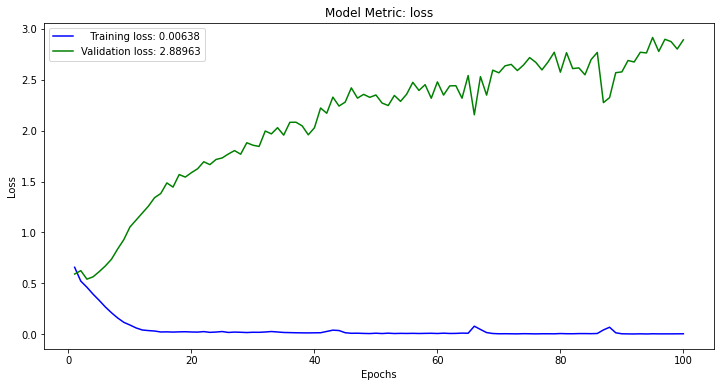

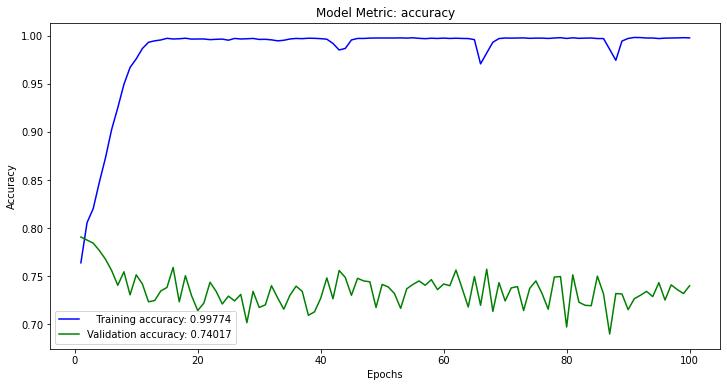

In [ ]:
print('number of epochs (x axis) vs. accuracy (y axis) plot\n')
print('Model without Early Stopping\n')
plot_keras_history(history)   

number of epochs (x axis) vs. accuracy (y axis) plot

Model with Early Stopping



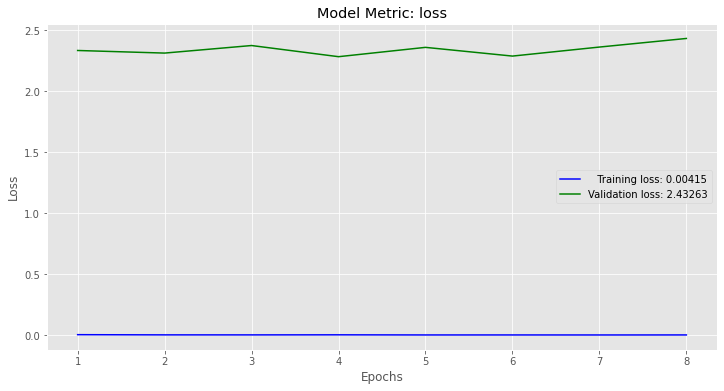

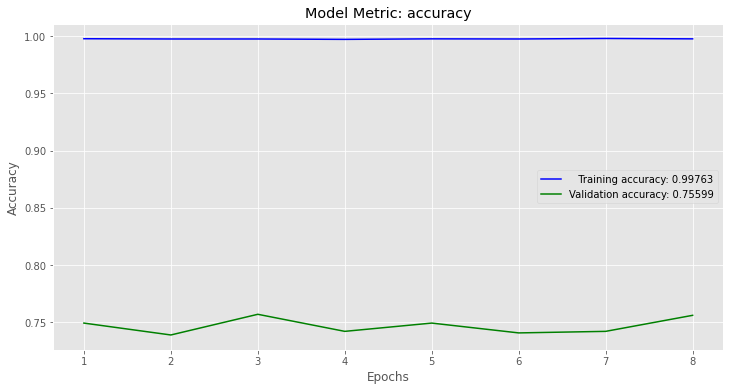

In [ ]:
print('number of epochs (x axis) vs. accuracy (y axis) plot\n')
print('Model with Early Stopping\n')
plot_keras_history(history01)   

In [ ]:
from itertools import cycle
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

Functions that will be used later for model evaluation

In [ ]:
def print_confusion_matrix(y_true,
                           y_pred,
                           class_names: List[str],
                           figsize: Tuple[int, int] = (10, 7),
                           fontsize: int = 14) -> pd.DataFrame:
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heat-map.

    For something more extraordinary check this repo:
    https://github.com/wcipriano/pretty-print-confusion-matrix


    :param class_names:  An ordered list of class names
    :param figsize: A 2-long tuple, the first value determining the horizontal size of the outputted
                    figure, the second determining the vertical size. Defaults to (10,7).
    :param fontsize: Font size for axes labels. Defaults to 14.
    :return: The confusion matrix as a dataset
    """
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

    df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    except ValueError:

        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                                 rotation=0,
                                 ha='right',
                                 fontsize=fontsize)

    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                                 rotation=45,
                                 ha='right',
                                 fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return df_cm

# ===============================================================

# <center>Chosen CNN model</center>

In order to improve the performance of our model we did the following:

1.	Fine tuned Hyper-Parameters : Hyper-parameters are the variables which are set before training and determine the network structure & how the network is trained. (e.g. batch size, number of epochs). 

2.	Used Dropout Layer : Dropout is regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.



In order to choose the best parameters for which our CNN presented the best results we did the following steps:

**1st step:** We added layers with different number of output filters in the convolution.


Our starting model had 25 filters.

We made the following comparisons with our starting model considering the number of filters:
* a] 1 filter
* b] 5 filters
* c] 10 filters
* d] 15 filters
* e] 30 filters

Then we added some extra layers to see what happens
* f1] one layer with 10 filters and another layer with 15 filters
* f2] one layer with 15 filters and another layer with 25 filters
* f3] one layer with 15 filters, one layer with 20 and another one with 30 filters
---------------------------------------------------

**2nd step:** We checked what happens if we change the kernel size, which specifies the length of the 1D convolution window.

We can afford to use larger convolution windows with 1D CNNs, because a window of size 3 contains only 3 feature vectors. We can thus easily afford 1D convolution windows of size 7 or 9.

Our starting model had kernel size equal to 3.

We made the following comparisons with our starting model considering the size of the kernel:
* a] 6
* b] 7
* c] 9



The results of the two first steps, where compared on the training set and validation set , where we checked if the accuracy and loss value for each one of the results is getting better or worse. This was done in order to have a model which learns well form our data.

--------------------------------------------------------
**3rd step:** We checked different batch sizes and number of epochs.

Fine tuning will be done by testing different values for these parameters and the results will be compared in the **validation set**. That's the data we held out from the training in the beginning.

We also used the $F_1$ score produced by the classification report to compare the results.

* The $F_1$ score takes both the precision and the recall into account. 

* Mathematically, it is the *harmonic mean* of the precision and the recall.

* We use $F_1$ instead of the standard mean because it punishes extreme values; if either of precision or recall is zero, it will be zero.



We examined the following values:
* **=> for batch size: 32, 64, 128**
* **=> for number of epochs: 10, 50, 100**

So far, we have used batch size equal to 64 and 100 epochs.

<center><ins>Explanation of parameters usefulness in the procedure:</ins></center>

* Epoch - A single pass over the entire training dataset.
* Mini-batch - Number of samples to pass thru the model before performing a single update of its weights.
* Iterations - Number of required mini-batches to complete a full epoch.

<ins>Comment1:</ins> Iterations per epoch are set automatically according to how many training examples there are present. 

<ins>Comment2:</ins> If we want to change the number of passes over the data, we use the epoch number.


* In general: 

  Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. It's definitely problem dependent.

  The models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge.


* In our case: 

  We have a relative training small dataset (~ 8500 samples), so we would probably be safe using a batch size of 32, which is pretty standard. 

  ---------------------------------------------------------------

**4th step:** We checked the effect from the addition of the dropout layer to our model.

* [Dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) is regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.

* The [idea behind dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout) is that at each training stage, individual nodes are either "dropped out" of the network with probability $p$ or kept with probability $1 - p$, so that a reduced network is left.

* Incoming and outgoing edges to a dropped-out node are also removed and only the reduced network is trained.

* After training for the epoch the removed nodes are then reinserted into the network with their original weights.

* At test time, no dropout is performed. Instead, the layer's output values are scaled out by $p$ to compensate for the fact that there are more neurons active than in training.


We used the model with the parameters chosen before and add a dropout layer.

We used different values for the dropout layer and the results were compared in the validation set. Before come to any conclusion, we also checked the $F_1$ score.


We examined the following values:
* a] 0.2
* b] 0.4

But first we checked whether the dropout givers better results:

* c1] before max pooling
* c2] after max pooling

-------------------------------------------------------------------



#<center><ins>Conclusions</ins></center>

After our analysis, we observed that the best results were achieved using the following:
* model with two layers, one with 15 and another one with 25 filters 
* kernel size = 3
* epochs = 100
* batch size = 32
* dropout rate = 0.2, used before the max pooling

In [ ]:
# network hyperparameters
embedding_dims = 300
nof_filters = 15
kernel_size = 3   
hidden_dims = 50   

dropout_rate = 0.2

# Setting model hyperparameters
batch_size = 32    
epochs = 100  

In [ ]:
'''
## 	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
'''

In [ ]:
print(x_train2.shape)
print(x_train2.shape[0])
print(x_train2.shape[1])
print(max_words)

(8851, 33)
8851
33
7500


In [ ]:
print('Build model...')

model_CNN = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model_CNN.add(Embedding(max_words2,
                    embedding_dims,
                    input_length=maxlen,
                    weights=[embedding_matrix], 
                    trainable=False))


# model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model_CNN.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model_CNN.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model_CNN.add(Dropout(dropout_rate))

model_CNN.add(GlobalMaxPooling1D())

#model55.add(Dense(hidden_dims))
model_CNN.add(Dense(hidden_dims, activation='relu'))

# model_CNN.add(Dropout(dropout_rate))
# model_CNN.add(Flatten())

# since we have a multiclass classification scheme with three classes, we selece THREE neuron with SOFTMAX activation.
model_CNN.add(Dense(3))
model_CNN.add(Activation('softmax'))

Build model...


In [ ]:
print(model_CNN.summary())

## conv1d (Conv1D):  (31, 25) : exasa 2 8eseis, output=pli8os filtrwn (ta channels pou elega stis images)
# global_max_pooling1d: epilegw 25 noumera apo auta pou prokiptoun

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 15)            13515     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 25)            1150      
_________________________________________________________________
dropout (Dropout)            (None, 29, 25)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

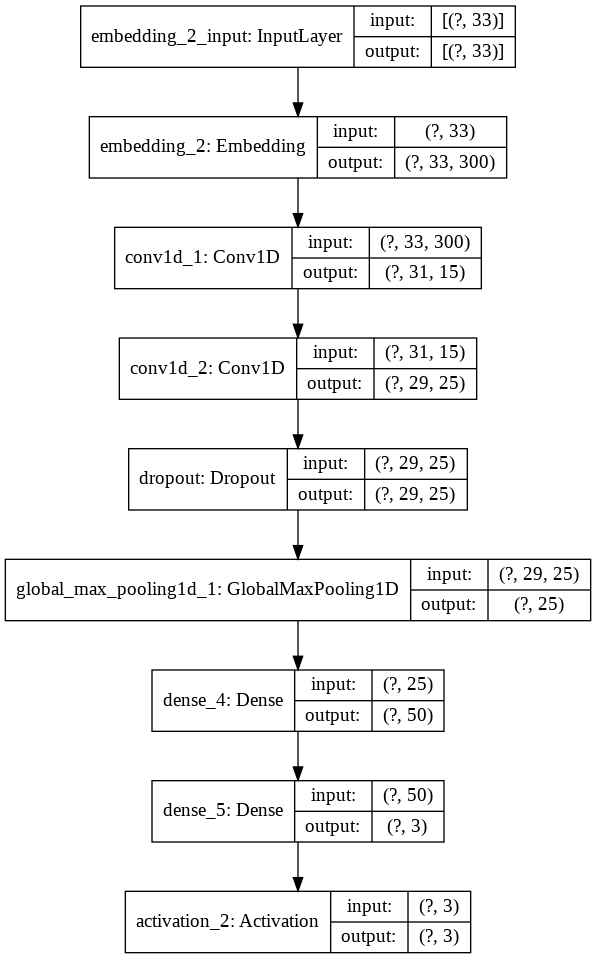

In [ ]:
plot_model(model_CNN, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

### Build network and train it untill validation loss reduces (EarlyStopping)

In [ ]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs, 
                            batch_size=batch_size, verbose=1, 
                            validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
277/277 [==============================] - 3s 10ms/step - loss: 0.6344 - accuracy: 0.7787 - val_loss: 0.5659 - val_accuracy: 0.7944
Epoch 2/100
277/277 [==============================] - 3s 9ms/step - loss: 0.5365 - accuracy: 0.7954 - val_loss: 0.5291 - val_accuracy: 0.7948
Epoch 3/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4866 - accuracy: 0.8078 - val_loss: 0.5305 - val_accuracy: 0.7953
Epoch 4/100
277/277 [==============================] - 3s 10ms/step - loss: 0.4514 - accuracy: 0.8187 - val_loss: 0.5281 - val_accuracy: 0.8025
Epoch 5/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4256 - accuracy: 0.8289 - val_loss: 0.5588 - val_accuracy: 0.7659
Epoch 6/100
277/277 [==============================] - 3s 10ms/step - loss: 0.3921 - accuracy: 0.8424 - val_loss: 0.5522 - val_accuracy: 0.7691
Epoch 7/100
277/277 [==============================] - 3s 10ms/step - loss: 0.3691 - accuracy: 0.8546 - val_loss: 0.5899 - val_accuracy: 0.

number of epochs (x axis) vs. accuracy (y axis) plot

Model with Early Stopping



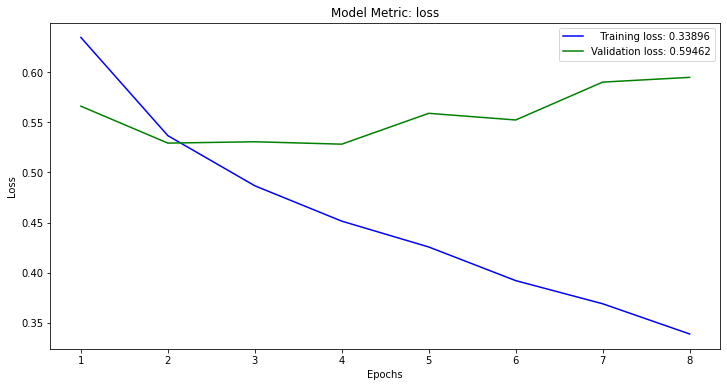

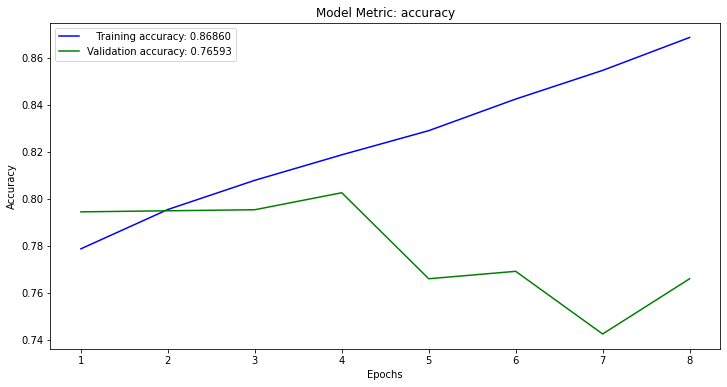

In [ ]:
print('number of epochs (x axis) vs. accuracy (y axis) plot\n')
print('Model with Early Stopping\n')
plot_keras_history(history_CNN)   

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score_CNN = model_CNN.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_CNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_CNN[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.8025

Test categorical_crossentropy: 0.528

Test accuracy: 80.2531 %


In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

In [ ]:
# More Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)

pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,CLAIM,EVIDENCE,NO LABEL
CLAIM,61,9,128
EVIDENCE,7,41,249
NO LABEL,16,28,1674


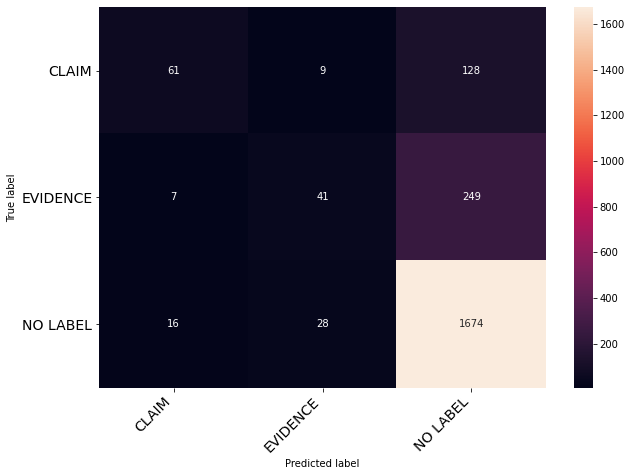

,CLAIM,EVIDENCE,NO LABEL
CLAIM,61,9,128
EVIDENCE,7,41,249
NO LABEL,16,28,1674


In [ ]:
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN, class_names=np.unique(y_train_temp))

In [ ]:
# y_pred_class_CNN = model_CNN.predict_classes(x_test2) 
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))
## ta deixnei kalitera
## f1-score: armonikos mesos metaksi precision kai recall (auto koitaw kuriws)

              precision    recall  f1-score   support

           0     0.7262    0.3081    0.4326       198
           1     0.5256    0.1380    0.2187       297
           2     0.8162    0.9744    0.8883      1718

    accuracy                         0.8025      2213
   macro avg     0.6893    0.4735    0.5132      2213
weighted avg     0.7691    0.8025    0.7577      2213



The classification_report function builds a text report showing the main classification metrics. 
From this, we mainly care about the results of $F_1$ score.

* The $F_1$ score takes both the precision and the recall into account. 

* Mathematically, it is the *harmonic mean* of the precision and the recall.

* We use $F_1$ instead of the standard mean because it punishes extreme values; if either of precision or recall is zero, it will be zero.

macro: True positivies, false positives and
    false negatives are computed for each class
    and their unweighted mean is returned.

weighted: Metrics are computed for each class
    and returns the mean weighted by the
    number of true instances in each class.

# Learning Rate
We created line plots of train and test accuracy for eight different values of learning rates. 

In [ ]:
from tensorflow import keras
from matplotlib import pyplot
 
 
# compile and plot learning curve
def compile_model14(x_train2, y_train_ar, x_test2, y_test_ar, lrate):
  # compile model
  opt = keras.optimizers.Adam(learning_rate=lrate)  
  model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

	# fit model
  history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs,batch_size=batch_size, verbose=1,validation_data=(x_test2, y_test_ar),callbacks=[es])

  # plot learning curves
  pyplot.plot(history_CNN.history['accuracy'], label='train')
  pyplot.plot(history_CNN.history['val_accuracy'], label='test')
  # pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
  pyplot.title('lrate='+str(lrate), pad=-50)

Epoch 1/100
277/277 [==============================] - 3s 11ms/step - loss: 649.2954 - accuracy: 0.7430 - val_loss: 0.6984 - val_accuracy: 0.7763
Epoch 2/100
277/277 [==============================] - 3s 11ms/step - loss: 1.6902 - accuracy: 0.7762 - val_loss: 0.8944 - val_accuracy: 0.7754
Epoch 3/100
277/277 [==============================] - 3s 10ms/step - loss: 0.7582 - accuracy: 0.7761 - val_loss: 0.7183 - val_accuracy: 0.7763
Epoch 4/100
277/277 [==============================] - 3s 10ms/step - loss: 0.7103 - accuracy: 0.7762 - val_loss: 0.7210 - val_accuracy: 0.7763
Epoch 5/100
277/277 [==============================] - 3s 10ms/step - loss: 0.7095 - accuracy: 0.7762 - val_loss: 0.7730 - val_accuracy: 0.7763
Epoch 00005: early stopping
Epoch 1/100
277/277 [==============================] - 2s 9ms/step - loss: 1.0545 - accuracy: 0.7762 - val_loss: 0.7463 - val_accuracy: 0.7759
Epoch 2/100
277/277 [==============================] - 3s 10ms/step - loss: 3.5832 - accuracy: 0.7763 - val

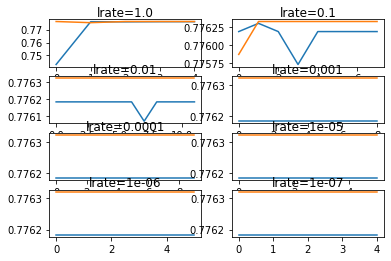

<Figure size 2592x2016 with 0 Axes>

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):

	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
 
	# fit model and plot learning curves for a learning rate
	compile_model14(x_train2, y_train_ar, x_test2, y_test_ar, learning_rates[i])
 
# show learning curves
plt.style.use('ggplot')
plt.figure(figsize=(36,28))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   # instead of pyplot.show()
# plt.tight_layout()

We observe that the accuracy is not changing for learning rate lower than 1E-03, which means that the optimizer has found a local minimum for the loss. This may be an undesirable minimum. One common local minimum is to always predict the class with the most number of data points. We have an imbalanced dataset, so we decided to use weighting on the classes to avoid this minimum.

# <center>**Class Weights**</center>


In [ ]:
print(np.unique(y))
print(np.unique(y_train_ar))
print('\n',y_train_ar)

['CLAIM' 'EVIDENCE' 'NO LABEL']
[0. 1.]

 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
print(np.ravel(y_train_ar,order='C'))
# order : {‘C’,’F’, ‘A’, ‘K’}, optional
# The elements of a are read using this index order. 
# ‘C’ means to index the elements in row-major, C-style order, with the last axis index changing fastest, back to the first axis index changing slowest.

[1. 0. 0. ... 0. 0. 1.]


In [ ]:
print(np.unique(y_train_ar))
print(np.unique(y_train_temp))
print(np.unique(y_train_new))

[0. 1.]
['CLAIM' 'EVIDENCE' 'NO LABEL']
[0 1 2]


Comment: We used y_train_temp, because this is the one before label encoding

In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(np.ravel(y_train_new,order='C')), class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y_train_new,order='C')),
                                                 np.ravel(y_train_new,order='C')))) 
class_weights

{0: 3.7251683501683504, 1: 2.4813568825343424, 2: 0.4294517224648229}

* sample_weights is used to provide a weight for each training sample. That means that you should pass a 1D array with the same number of elements as your training samples (indicating the weight for each of those samples).

* class_weights is used to provide a weight or bias for each output class. This means you should pass a weight for each class that you are trying to classify.

sample_weight must be given a numpy array, since its shape will be evaluated.

In [ ]:
print(sort_dict)

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]


# ====================================================================

## **Checkpoint the initial weights**


In [ ]:
# To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.
import os
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model_CNN.save_weights(initial_weights)

# ====================================================================

In [ ]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model_CNN.load_weights(initial_weights)

history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs, 
                            batch_size=batch_size, verbose=1, class_weight=class_weights, 
                            validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.6915 - accuracy: 0.7187 - val_loss: 0.7600 - val_accuracy: 0.6507
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.6300 - accuracy: 0.7372 - val_loss: 0.8471 - val_accuracy: 0.6173
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5878 - accuracy: 0.7517 - val_loss: 0.6537 - val_accuracy: 0.7180
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5356 - accuracy: 0.7757 - val_loss: 0.8841 - val_accuracy: 0.6046
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5033 - accuracy: 0.7823 - val_loss: 0.6331 - val_accuracy: 0.7347
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4675 - accuracy: 0.7943 - val_loss: 0.9085 - val_accuracy: 0.5951
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4368 - accuracy: 0.8082 - val_loss: 0.7994 - val_accuracy:

In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_CNN = model_CNN.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_CNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_CNN[1]*100))

35/35 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7347

Test categorical_crossentropy: 0.633

Test accuracy: 73.4749 %


In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3843    0.4697    0.4227       198
           1     0.3529    0.4242    0.3853       297
           2     0.8717    0.8190    0.8445      1718

    accuracy                         0.7347      2213
   macro avg     0.5363    0.5710    0.5509      2213
weighted avg     0.7585    0.7347    0.7452      2213



In [ ]:
conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)
pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,CLAIM,EVIDENCE,NO LABEL
CLAIM,93,39,66
EVIDENCE,30,126,141
NO LABEL,119,192,1407



## Classification report without class weights:


|                |  f1-score | support |
|----------------| ----------| --------| 
|           0    |  0.4326   |  198    |
|           1    |  0.2187   |  297    |
|           2    |  0.8883   |  1718   |
|                            |         |
|    accuracy    |  0.8025   |  2213   |                  
|   macro avg    |  0.5132   |  2213   |
| weighted avg   |  0.7577   |  2213   |




## Classification report with class weights:

|                |  f1-score | support |
|----------------| ----------| --------| 
|           0    |  0.4227   |  198    |
|           1    |  0.3853   |  297    |
|           2    |  0.8445   |  1718   |
|                            |         |
|    accuracy    |  0.7347   |  2213   |
|   macro avg    |  0.5509   |  2213   |
| weighted avg   |  0.7452   |  2213   |



* F1-scores comparison 

|   |F1-scores (without class weights) | F1-scores (with class weights) | 
|----------------|-------| -------| 
| 0 | .4326 | .4227 |
| 1 | .2187 | .3853 |
| 2 | .8883 | .8445 |


* Accuracy and Loss comparison 


|   |F1-scores (without class weights) | F1-scores (with class weights) | 
|----------------|-------| -------| 
| Test categorical_crossentropy | .528 | .633 |
| Test accuracy | 80.2 % | 73.4 % |

<ins>**Conclusion:**</ins>
Although the accuracy in the test set drops significantly, the main target of our analysis is to detect as many arguments as we can. We observe that with the addition of class weights, the F1-scores for the first two classes are in general a lot better. That's why in the confusion matrix we see that we found more evidences and claims.
So, from now on we wil use class weights when fitting our model.



# **Optimizers**

# 1) Adam Optimizer

In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_CNN = model_CNN.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_CNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_CNN[1]*100))

35/35 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7347

Test categorical_crossentropy: 0.633

Test accuracy: 73.4749 %


In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3843    0.4697    0.4227       198
           1     0.3529    0.4242    0.3853       297
           2     0.8717    0.8190    0.8445      1718

    accuracy                         0.7347      2213
   macro avg     0.5363    0.5710    0.5509      2213
weighted avg     0.7585    0.7347    0.7452      2213



In [ ]:
conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)
pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,CLAIM,EVIDENCE,NO LABEL
CLAIM,93,39,66
EVIDENCE,30,126,141
NO LABEL,119,192,1407


# 2) Stochastic Gradient Descent (SDG) optimizer

In [ ]:
# pass optimizer by name: default parameters will be used
model_CNN.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# We train (fit our data to) our model
history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs, 
                            batch_size=batch_size, verbose=1, class_weight=class_weights, 
                            validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4166 - accuracy: 0.8195 - val_loss: 0.8046 - val_accuracy: 0.6493
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4022 - accuracy: 0.8208 - val_loss: 0.7294 - val_accuracy: 0.6900
Epoch 3/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3884 - accuracy: 0.8256 - val_loss: 0.6631 - val_accuracy: 0.7212
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3747 - accuracy: 0.8314 - val_loss: 0.8170 - val_accuracy: 0.6575
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3767 - accuracy: 0.8332 - val_loss: 0.8976 - val_accuracy: 0.6295
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3543 - accuracy: 0.8371 - val_loss: 0.9957 - val_accuracy: 0.5888
Epoch 7/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3457 - accuracy: 0.8419 - val_loss: 0.8345 - val_accuracy:

In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_CNN = model_CNN.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_CNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_CNN[1]*100))

35/35 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.7212

Test categorical_crossentropy: 0.663

Test accuracy: 72.1193 %


In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3684    0.4596    0.4090       198
           1     0.3233    0.3973    0.3565       297
           2     0.8663    0.8073    0.8358      1718

    accuracy                         0.7212      2213
   macro avg     0.5193    0.5547    0.5338      2213
weighted avg     0.7489    0.7212    0.7333      2213



In [ ]:
conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)
pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,CLAIM,EVIDENCE,NO LABEL
CLAIM,91,36,71
EVIDENCE,36,118,143
NO LABEL,120,211,1387


The final results from the model using **Adam** and **SDG** optimizers are: 


|                |F1-scores (Adam) | F1-scores (SDG) | 
|----------------|-------| -------| 
| 0              | .4227 | .4090 |
| 1              | .3853 | .3565 |
| 2              | .8445 | .8358 |
|                                |
| accuracy       | .7347 | .7212 |
| weighted avg   | .7452 | .7333 |


We observe that the **Adam optimizer** has better results, due to better distribution (F1-scores) in the first two classes and bigger accuracy. So, this is the one we will use from now on.

# Learning Rate after the addition of class weights

In order to be more thorough, we will check the loss and accuracy score in the test set along with the classification report of the following learning rate values:
* 1e-2 (=0.01)
* 1e-3
* 1e-4
* 1e-5


learning_rate argument: A Tensor, floating point value, or a schedule that is a tf.keras.optimizers.schedules.
LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. 

The learning rate defaults to 0.01.

* Learning rate = 1e-2

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.8813 - accuracy: 0.5672 - val_loss: 0.7076 - val_accuracy: 0.6787
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.7737 - accuracy: 0.6155 - val_loss: 0.9054 - val_accuracy: 0.5793
Epoch 3/100
139/139 [==============================] - 2s 14ms/step - loss: 0.7011 - accuracy: 0.6433 - val_loss: 0.9527 - val_accuracy: 0.5269
Epoch 4/100
139/139 [==============================] - 2s 14ms/step - loss: 0.6618 - accuracy: 0.6585 - val_loss: 0.7815 - val_accuracy: 0.6091
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.6086 - accuracy: 0.6739 - val_loss: 0.6365 - val_accuracy: 0.7135
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.5724 - accuracy: 0.7068 - val_loss: 0.7902 - val_accuracy: 0.5996
Epoch 7/100
139/139 [==============================] - 2s 14ms/step - loss: 0.5064 - accuracy: 0.7205 - val_loss: 0.7755 - val_accuracy:

Text(0.5, 1.0, 'lrate=0.01')

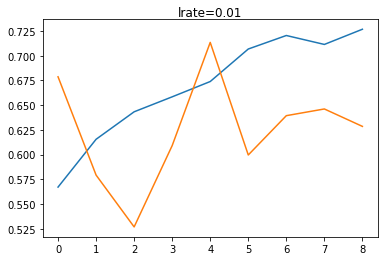

In [ ]:
# Line plots of train and test accuracy for eight different values of learning rate 

from tensorflow import keras
from matplotlib import pyplot

lrate = 1e-2
opt = keras.optimizers.Adam(learning_rate=lrate)  
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs,batch_size=batch_size, verbose=1, class_weight=class_weights,validation_data=(x_test2, y_test_ar),callbacks=[es])

# plot learning curves
pyplot.plot(history_CNN.history['accuracy'], label='train')
pyplot.plot(history_CNN.history['val_accuracy'], label='test')
# pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
pyplot.title('lrate='+str(lrate), pad=-50)

In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3529    0.3939    0.3723       198
           1     0.2941    0.3704    0.3279       297
           2     0.8597    0.8097    0.8339      1718

    accuracy                         0.7135      2213
   macro avg     0.5023    0.5247    0.5114      2213
weighted avg     0.7385    0.7135    0.7247      2213



* Learning rate = 1e-3

Epoch 1/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4517 - accuracy: 0.7386 - val_loss: 0.7906 - val_accuracy: 0.6317
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3769 - accuracy: 0.7617 - val_loss: 0.7767 - val_accuracy: 0.6679
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3513 - accuracy: 0.7799 - val_loss: 0.7929 - val_accuracy: 0.6647
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3281 - accuracy: 0.7939 - val_loss: 0.8289 - val_accuracy: 0.6778
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3054 - accuracy: 0.8096 - val_loss: 0.8875 - val_accuracy: 0.6588
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.2790 - accuracy: 0.8219 - val_loss: 0.8987 - val_accuracy: 0.6774
Epoch 00006: early stopping


Text(0.5, 1.0, 'lrate=0.001')

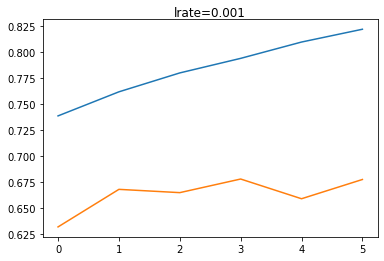

In [ ]:
# Line plots of train and test accuracy for eight different values of learning rate 

from tensorflow import keras
from matplotlib import pyplot

lrate = 1e-3
opt = keras.optimizers.Adam(learning_rate=lrate)  
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs,batch_size=batch_size, verbose=1, class_weight=class_weights,validation_data=(x_test2, y_test_ar),callbacks=[es])

# plot learning curves
pyplot.plot(history_CNN.history['accuracy'], label='train')
pyplot.plot(history_CNN.history['val_accuracy'], label='test')
# pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
pyplot.title('lrate='+str(lrate), pad=-50)

In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3357    0.4747    0.3933       198
           1     0.2902    0.5657    0.3836       297
           2     0.8981    0.7078    0.7917      1718

    accuracy                         0.6679      2213
   macro avg     0.5080    0.5827    0.5228      2213
weighted avg     0.7662    0.6679    0.7013      2213



* Learning rate = 1e-4

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.3417 - accuracy: 0.7882 - val_loss: 0.7952 - val_accuracy: 0.6620
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3379 - accuracy: 0.7930 - val_loss: 0.7950 - val_accuracy: 0.6647
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3353 - accuracy: 0.7906 - val_loss: 0.8001 - val_accuracy: 0.6647
Epoch 4/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3279 - accuracy: 0.7922 - val_loss: 0.8087 - val_accuracy: 0.6638
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3255 - accuracy: 0.7935 - val_loss: 0.8079 - val_accuracy: 0.6661
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3185 - accuracy: 0.7974 - val_loss: 0.8124 - val_accuracy: 0.6656
Epoch 00006: early stopping


Text(0.5, 1.0, 'lrate=0.0001')

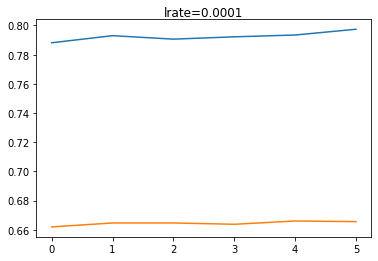

In [ ]:
# Line plots of train and test accuracy for eight different values of learning rate 

from tensorflow import keras
from matplotlib import pyplot

lrate = 1e-4
opt = keras.optimizers.Adam(learning_rate=lrate)  
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs,batch_size=batch_size, verbose=1, class_weight=class_weights,validation_data=(x_test2, y_test_ar),callbacks=[es])

# plot learning curves
pyplot.plot(history_CNN.history['accuracy'], label='train')
pyplot.plot(history_CNN.history['val_accuracy'], label='test')
# pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
pyplot.title('lrate='+str(lrate), pad=-50)

In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3253    0.4747    0.3860       198
           1     0.2900    0.5556    0.3811       297
           2     0.8945    0.7055    0.7888      1718

    accuracy                         0.6647      2213
   macro avg     0.5032    0.5786    0.5186      2213
weighted avg     0.7624    0.6647    0.6980      2213



* Learning rate = 1e-5

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.3299 - accuracy: 0.7925 - val_loss: 0.7950 - val_accuracy: 0.6661
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3282 - accuracy: 0.7930 - val_loss: 0.7971 - val_accuracy: 0.6647
Epoch 3/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3372 - accuracy: 0.7904 - val_loss: 0.7988 - val_accuracy: 0.6643
Epoch 4/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3321 - accuracy: 0.7905 - val_loss: 0.8012 - val_accuracy: 0.6629
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3318 - accuracy: 0.7903 - val_loss: 0.8016 - val_accuracy: 0.6634
Epoch 00005: early stopping


Text(0.5, 1.0, 'lrate=1e-05')

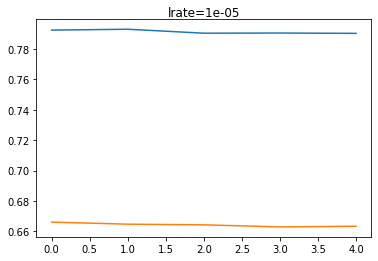

In [ ]:
# Line plots of train and test accuracy for eight different values of learning rate 

from tensorflow import keras
from matplotlib import pyplot

lrate = 1e-5
opt = keras.optimizers.Adam(learning_rate=lrate)  
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs,batch_size=batch_size, verbose=1, class_weight=class_weights,validation_data=(x_test2, y_test_ar),callbacks=[es])

# plot learning curves
pyplot.plot(history_CNN.history['accuracy'], label='train')
pyplot.plot(history_CNN.history['val_accuracy'], label='test')
# pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
pyplot.title('lrate='+str(lrate), pad=-50)

In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3275    0.4747    0.3876       198
           1     0.2905    0.5556    0.3815       297
           2     0.8947    0.7072    0.7900      1718

    accuracy                         0.6661      2213
   macro avg     0.5042    0.5792    0.5197      2213
weighted avg     0.7629    0.6661    0.6992      2213



## <center>Learning rates comparison</center>

The results from the above tests, are the following: 


|   f1-score     |lr = 1e-2 | lr = 1e-3 | lr = 1e-4 | lr = 1e-5 |
|----------------|----------| ----------| ----------| ----------| 
| 0              | .3723    | .3933     |  .3860    |  .3876    |
| 1              | .3279    | .3836     |  .3811    |  .3815    |
| 2              | .8339    | .7917     |  .7888    |  .7900    |
|                                                               |
| accuracy       |  .7135   |  .6679    |  .6647    |  .6661    | 
| weighted avg   |  .7247   |  .7013    |  .6980    |  .6992    | 



We observe that the accuracy in the test set drops as the learning rate increases.

Nevertheless we care more about the F1-scores in the first two classes, where the best results were achieved with **learning rate = 1e-3**. After that value, the scores remain almost stable. 
So, this is the one we will use from now on.

# ===========================================================

In [ ]:
# build classification report 

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np


def plot_multi_class_roc_auc_curves(nb_classes, y_true, y_pred_score, lw: int = 2):
    """
    ROC, AUC for a categorical classifier
    
    ROC curve extends to problems with three or more classes with what is known as the one-vs-all approach.
    For instance, if we have three classes, we will create three ROC curves,

 

    For each class, we take it as the positive class and group the rest classes jointly as the negative class.

 

    Class 1 vs classes 2&3
    Class 2 vs classes 1&3
    Class 3 vs classes 1&2

 

    :param nb_classes:
    :param y_true:
    :param y_pred_score:
    :param lw:
    :return:
    """

 

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

 

    for i in range(nb_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_score[:, i])

 

        roc_auc[i] = auc(fpr[i], tpr[i])

 

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_score.ravel())

 

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

 

    # Compute macro-average ROC curve and ROC area

 

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))

 

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)

 

    for i in range(nb_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

 

    # Finally average it and compute AUC
    mean_tpr /= nb_classes

 

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

 

    # Plot all ROC curves
    plt.figure(1)
    plt.plot(fpr["micro"],
             tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink',
             linestyle=':',
             linewidth=4)

 

    plt.plot(fpr["macro"],
             tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy',
             linestyle=':',
             linewidth=4)

 

    colors = cycle(['aqua',
                    'darkorange',
                    'cornflowerblue'])

 

    for i, color in zip(range(nb_classes), colors):
        plt.plot(fpr[i],
                 tpr[i],
                 color=color,
                 lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

 

    plt.plot([0, 1],
             [0, 1],
             'k--',
             lw=lw)

 

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

 

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

 

    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    # plt.show()

 

    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.7, 1)

 

    plt.plot(fpr["micro"],
             tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink',
             linestyle=':',
             linewidth=4)

 

    plt.plot(fpr["macro"],
             tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy',
             linestyle=':',
             linewidth=4)

 

    colors = cycle(['aqua',
                    'darkorange',
                    'cornflowerblue'])

 

    for i, color in zip(range(nb_classes), colors):
        plt.plot(fpr[i],
                 tpr[i],
                 color=color,
                 lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

 

    plt.plot([0, 1],
             [0, 1],
             'k--', lw=lw)

 

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

## Model with chosen optimizer and learning rate

In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))

              precision    recall  f1-score   support

           0     0.3149    0.5455    0.3993       198
           1     0.3370    0.5152    0.4075       297
           2     0.9004    0.7421    0.8137      1718

    accuracy                         0.6941      2213
   macro avg     0.5174    0.6009    0.5401      2213
weighted avg     0.7724    0.6941    0.7221      2213



In [ ]:
conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)
pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,CLAIM,EVIDENCE,NO LABEL
CLAIM,108,40,50
EVIDENCE,53,153,91
NO LABEL,182,261,1275


In [ ]:
n_classes = y.label.nunique()
print(n_classes)
print(y_train_ar.shape[1])

# print the number of total distinct classes
print(np.max(y_train_new)+1, 'classes')

3
3
3 classes


In [ ]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)   # model_CNN.predict(x_test2)


print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_CNN, digits=4))   # y_test_ar   , y_pred_class_CNN 

In [ ]:
y_score_CNN = model_CNN.predict(x_test2)
y_score_CNN

array([[0.11886848, 0.17311141, 0.7080201 ],
       [0.28408203, 0.25913966, 0.4567783 ],
       [0.1867059 , 0.26062548, 0.55266863],
       ...,
       [0.11433374, 0.1785908 , 0.70707536],
       [0.3794417 , 0.08683579, 0.5337225 ],
       [0.53748274, 0.05494035, 0.40757692]], dtype=float32)

In [ ]:
y_test_ar

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

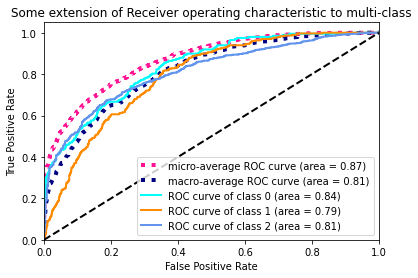

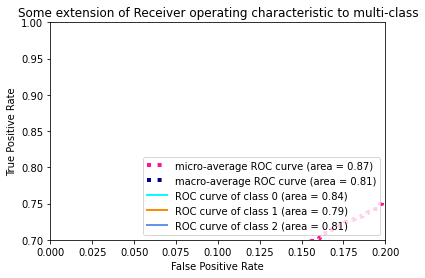

In [ ]:
plot_multi_class_roc_auc_curves(nb_classes=n_classes,
                                y_true=y_test_ar,
                                y_pred_score=y_score_CNN)

### Loss plots kai accuracy plots

number of epochs (x axis) vs. accuracy (y axis) plot

Model without Early Stopping



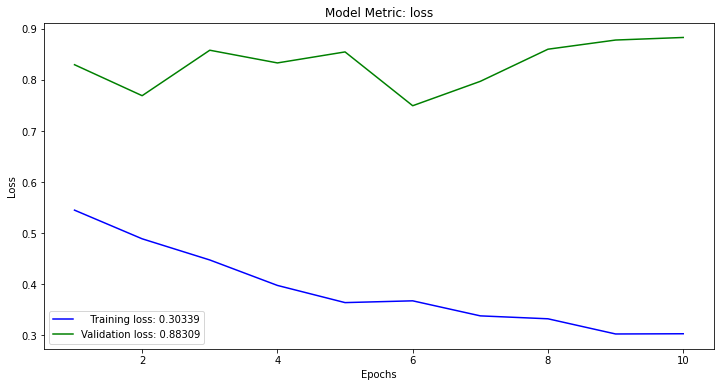

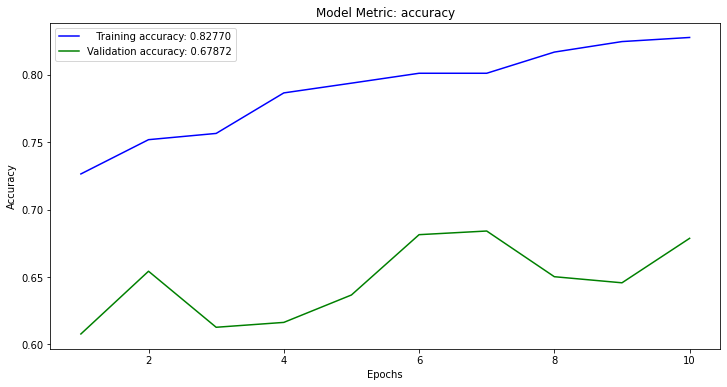

In [ ]:
print('number of epochs (x axis) vs. accuracy (y axis) plot\n')
print('Model without Early Stopping\n')
plot_keras_history(history_CNN)   

# Get the weights of the trained CNN model

In [ ]:
# To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.
import os
import tempfile

weights365 = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'Model_CNN365')
# model_CNN.save_weights(weights365)
model_CNN.save(weights365)

Load the weights

In [ ]:
'''
# We load the weights
text_weights = model.layers[0].get_weights()[0]
'''

# ========================================================================================================================================================================

## RNN Model

In [ ]:
from __future__ import print_function

import numpy as np

np.random.seed(1337)  # for reproducibility

from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, Input, Concatenate, Bidirectional, concatenate , TimeDistributed
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.callbacks import EarlyStopping

# RNN model definition without drop out

In [ ]:
# RNN model definition without drop out
def build_RNN_model1(em,
                  max_len: int,
                  max_feats: int,
                  emb_dimensions: int,
                  n_outputs: int = 3):
    """

    :param max_len:
    :param max_feats:
    :param emb_dimensions:
    :param n_outputs:
    :return:
    """
    # this is the placeholder tensor for the input sequences
    sequence = Input(shape=(max_len,), dtype='int32')
    emb_layer = em
    embedded = emb_layer(sequence)

    lstm = Bidirectional(LSTM(33, return_sequences=False))(embedded)
    
    output = Dense(n_outputs, activation='softmax')(lstm)

    model = Model(inputs=[sequence], outputs=[output])

    # try using different optimizers and different optimizer configs
    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    return model

In [ ]:
# create the embedding layer for the RNN model
# in order to import it inside the calling function

em=(Embedding(max_words, 
            embedding_dims, 
            input_length=maxlen, 
            weights=[embedding_matrix], 
            trainable=False))

In [ ]:
rnn_model1 = build_RNN_model1(em,max_len=maxlen, max_feats=max_words, emb_dimensions=33)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 33)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 33, 300)           2250000   
_________________________________________________________________
bidirectional (Bidirectional (None, 66)                88176     
_________________________________________________________________
dense (Dense)                (None, 3)                 201       
Total params: 2,338,377
Trainable params: 88,377
Non-trainable params: 2,250,000
_________________________________________________________________
None


In [ ]:
# fit/train rnn model without drop out 
#### with 30 epochs and batch size 128 ####
rnn_model1.fit(x_train2, y_train_ar,
                       epochs=30,
                       batch_size=128,
                       validation_data=(x_test2, y_test_ar), callbacks=es)

Epoch 1/30
70/70 [==============================] - 8s 111ms/step - loss: 0.0029 - accuracy: 0.9988 - val_loss: 2.0526 - val_accuracy: 0.7533
Epoch 2/30
70/70 [==============================] - 7s 104ms/step - loss: 0.0029 - accuracy: 0.9983 - val_loss: 2.1655 - val_accuracy: 0.7592
Epoch 3/30
70/70 [==============================] - 7s 99ms/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 1.6578 - val_accuracy: 0.7483
Epoch 4/30
70/70 [==============================] - 8s 108ms/step - loss: 0.0961 - accuracy: 0.9668 - val_loss: 1.4348 - val_accuracy: 0.7311
Epoch 5/30
70/70 [==============================] - 7s 100ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 1.5291 - val_accuracy: 0.7601
Epoch 6/30
70/70 [==============================] - 7s 102ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 1.5964 - val_accuracy: 0.7551
Epoch 7/30
70/70 [==============================] - 7s 104ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 1.6756 - val_accuracy: 0.7592
Epoch 8

In [ ]:
# show predictions for the test dataset using RNN1 
y_prediction = np.argmax(rnn_model1.predict(x_test2), axis=-1)
print(y_prediction1[0:100])

[2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]


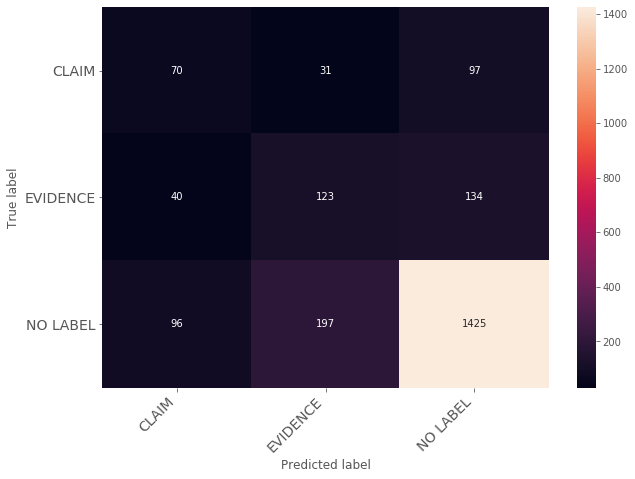

,CLAIM,EVIDENCE,NO LABEL
CLAIM,70,31,97
EVIDENCE,40,123,134
NO LABEL,96,197,1425


In [ ]:
# print confusion matrix 
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), 
                       y_pred=y_prediction, 
                       class_names=class_names)

/Users/sils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



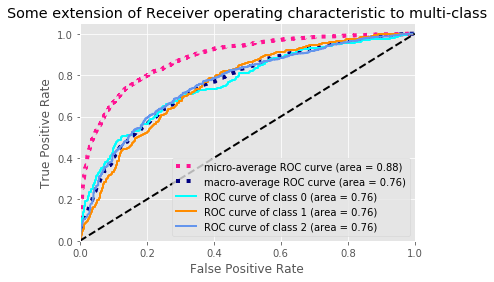

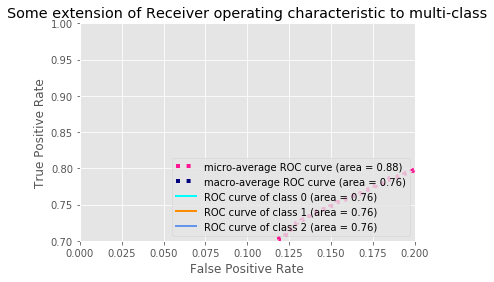

In [ ]:
y_prediction_prob =rnn_model1.predict(x_test2)

plot_multi_class_roc_auc_curves(nb_classes=3,
                              y_true=y_test_ar,
                             y_pred_score=y_prediction_prob)

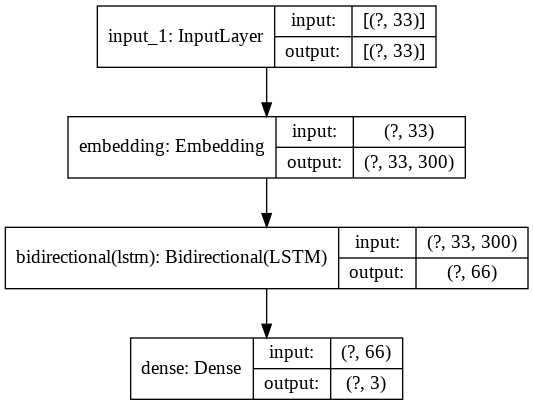

In [ ]:
plot_model(rnn_model1,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)

In [ ]:
# print classification report 
print(classification_report(y_test_ar.argmax(axis=1), y_prediction, digits=4))

              precision    recall  f1-score   support

           0     0.3398    0.3535    0.3465       198
           1     0.3504    0.4141    0.3796       297
           2     0.8605    0.8295    0.8447      1718

    accuracy                         0.7311      2213
   macro avg     0.5169    0.5324    0.5236      2213
weighted avg     0.7455    0.7311    0.7377      2213



In [ ]:
# fit/train rnn model without drop out 
#### with 30 epochs and batch size 128 ####
#########no early stopping ########
rnn_model1.fit(x_train2, y_train_ar,
                       epochs=30,
                       batch_size=128,
                       validation_data=(x_test2, y_test_ar))

Epoch 1/30
70/70 [==============================] - 8s 117ms/step - loss: 0.0605 - accuracy: 0.9802 - val_loss: 1.5313 - val_accuracy: 0.7745
Epoch 2/30
70/70 [==============================] - 7s 104ms/step - loss: 0.0406 - accuracy: 0.9895 - val_loss: 1.3929 - val_accuracy: 0.7438
Epoch 3/30
70/70 [==============================] - 7s 105ms/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 1.4952 - val_accuracy: 0.7569
Epoch 4/30
70/70 [==============================] - 8s 108ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 1.5464 - val_accuracy: 0.7483
Epoch 5/30
70/70 [==============================] - 7s 102ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 1.5936 - val_accuracy: 0.7483
Epoch 6/30
70/70 [==============================] - 9s 124ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 1.6482 - val_accuracy: 0.7506
Epoch 7/30
70/70 [==============================] - 9s 133ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 1.6865 - val_accuracy: 0.7551
Epoch 

In [ ]:
# show predictions for the test dataset using RNN1 
y_prediction1 = np.argmax(rnn_model1.predict(x_test2), axis=-1)
print(y_prediction1[0:100])

[2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]


In [ ]:
# prepare labels for confusion matrix 
class_names=np.unique(y)
print(class_names)
print(type(class_names))
class_names=list(class_names)
print(type(class_names))



['CLAIM' 'EVIDENCE' 'NO LABEL']
<class 'numpy.ndarray'>
<class 'list'>


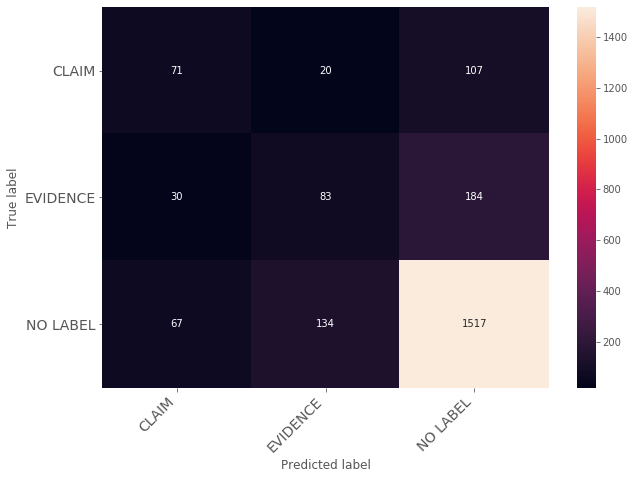

,CLAIM,EVIDENCE,NO LABEL
CLAIM,71,20,107
EVIDENCE,30,83,184
NO LABEL,67,134,1517


In [ ]:
# print confusion matrix 
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), 
                       y_pred=y_prediction1, 
                       class_names=class_names)
 

/Users/sils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



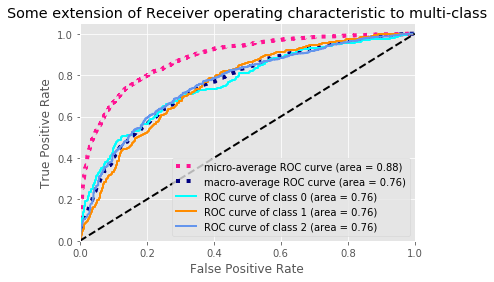

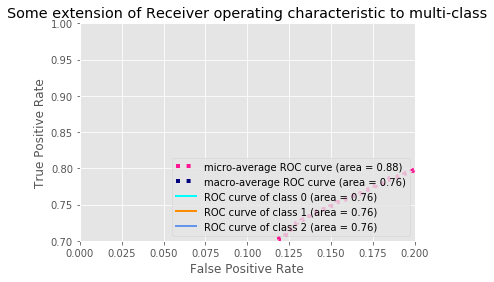

In [ ]:
y_prediction_prob =rnn_model1.predict(x_test2)

plot_multi_class_roc_auc_curves(nb_classes=3,
                              y_true=y_test_ar,
                             y_pred_score=y_prediction_prob)

In [ ]:
!pip uninstall pydot
#!pip uninstall graphviz
#!pip uninstall pydotplus

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [ ]:
!pip install pydot
#!pip install graphviz
#!pip install pydotplus
import pydot 
import graphviz
from tensorflow.keras.utils import plot_model

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


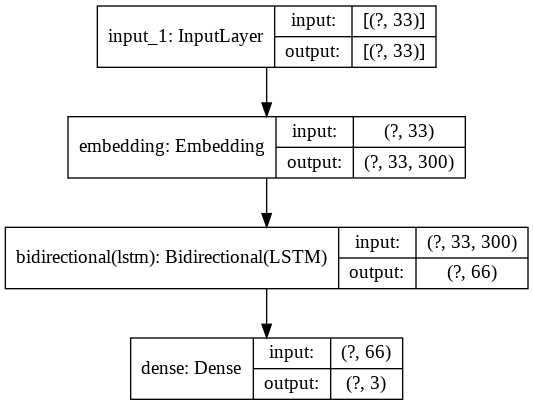

In [ ]:
plot_model(rnn_model1,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)


In [ ]:
# print classification report 
print(classification_report(y_test_ar.argmax(axis=1), y_prediction1, digits=4))

              precision    recall  f1-score   support

           0     0.4226    0.3586    0.3880       198
           1     0.3502    0.2795    0.3109       297
           2     0.8390    0.8830    0.8605      1718

    accuracy                         0.7551      2213
   macro avg     0.5373    0.5070    0.5198      2213
weighted avg     0.7362    0.7551    0.7444      2213



In [ ]:
# Demo on an indicative text
my_text = x_train["tokens"][90]

pred=predict_new_arguement(text=my_text,
                    tokenizer=tokenizer,
                    seq_max_length=maxlen,
                    model=rnn_model)

print(pred)

The argument has No Label


## RNN MODEL1 EVALUATION

In [ ]:
# evaluation on test dataset
rnn_model1.evaluate(x_test2, y_test_ar, verbose=1)

70/70 [==============================] - 2s 31ms/step - loss: 1.4348 - accuracy: 0.7311


[1.4347550868988037, 0.7311342358589172]

In [ ]:
# train/fit RNN model 1 
#### with 60 epochs and batch size 128 ####
rnn_model1.fit(x_train2, y_train_ar,
                    epochs=60,
                    batch_size=128,
                    validation_data=(x_test2, y_test_ar))

Epoch 1/60
70/70 [==============================] - 8s 119ms/step - loss: 0.3892 - accuracy: 0.8474 - val_loss: 0.4372 - val_accuracy: 0.8368
Epoch 2/60
70/70 [==============================] - 7s 98ms/step - loss: 0.3676 - accuracy: 0.8571 - val_loss: 0.3920 - val_accuracy: 0.8425
Epoch 3/60
70/70 [==============================] - 8s 116ms/step - loss: 0.3376 - accuracy: 0.8682 - val_loss: 0.3627 - val_accuracy: 0.8588
Epoch 4/60
70/70 [==============================] - 9s 122ms/step - loss: 0.3154 - accuracy: 0.8793 - val_loss: 0.3271 - val_accuracy: 0.8707
Epoch 5/60
70/70 [==============================] - 9s 129ms/step - loss: 0.2864 - accuracy: 0.8914 - val_loss: 0.2902 - val_accuracy: 0.8820
Epoch 6/60
70/70 [==============================] - 10s 142ms/step - loss: 0.2662 - accuracy: 0.9002 - val_loss: 0.2786 - val_accuracy: 0.8865
Epoch 7/60
70/70 [==============================] - 9s 124ms/step - loss: 0.2434 - accuracy: 0.9110 - val_loss: 0.2354 - val_accuracy: 0.9063
Epoch 

70/70 [==============================] - 9s 130ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 59/60
70/70 [==============================] - 9s 131ms/step - loss: 0.0039 - accuracy: 0.9983 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 60/60
70/70 [==============================] - 8s 110ms/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.0015 - val_accuracy: 1.0000


In [ ]:
# show predictions for the test dataset using RNN1 with 60 epochs
y_prediction11 = np.argmax(rnn_model1.predict(x_test2), axis=-1)
print(y_prediction11[0:100])

[2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2
 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 1 2 2 2 2 2 2 2 2 0]


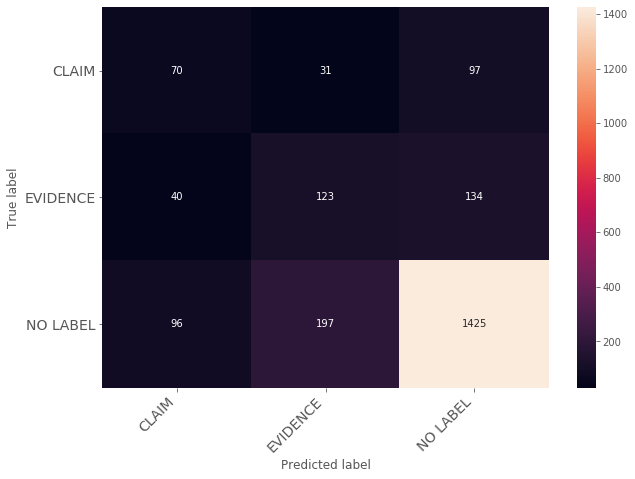

,CLAIM,EVIDENCE,NO LABEL
CLAIM,70,31,97
EVIDENCE,40,123,134
NO LABEL,96,197,1425


In [ ]:
# print confusion matrix 
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), 
                       y_pred=y_prediction11, 
                       class_names=class_names)
 

In [ ]:
y_prediction_prob =rnn_model1.predict(x_test2)

plot_multi_class_roc_auc_curves(nb_classes=3,
                              y_true=y_test_ar,
                             y_pred_score=y_prediction_prob)

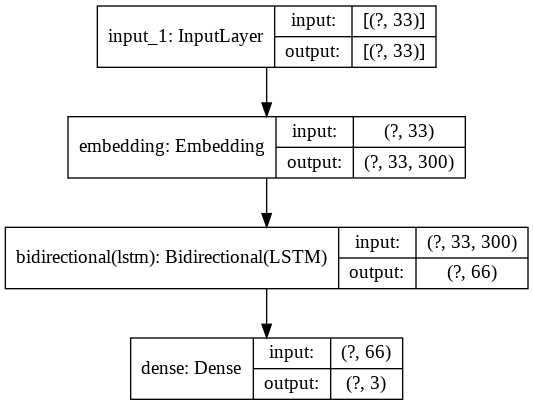

In [ ]:
plot_model(rnn_model1,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)

In [ ]:
print(classification_report(y_test_ar.argmax(axis=1), y_prediction11, digits=4))

              precision    recall  f1-score   support

           0     0.3855    0.3232    0.3516       198
           1     0.3502    0.3030    0.3249       297
           2     0.8402    0.8754    0.8575      1718

    accuracy                         0.7492      2213
   macro avg     0.5253    0.5006    0.5113      2213
weighted avg     0.7338    0.7492    0.7407      2213



# RNN model definition with drop out

In [ ]:
# RNN model with drop out rate 0.5
def build_model_withdr1(em,
                  max_len: int,
                  max_feats: int,
                  emb_dimensions: int,
                  n_outputs: int = 3):
    """

    :param max_len:
    :param max_feats:
    :param emb_dimensions:
    :param n_outputs:
    :return:
    """
    # this is the placeholder tensor for the input sequences
    sequence = Input(shape=(max_len,), dtype='int32')

    emb_layer = em
    embedded = emb_layer(sequence)

    lstm = Bidirectional(LSTM(33, return_sequences=False))(embedded)
    
    #adding drop out layer with 0.5 rate
    after_dp = Dropout(0.5)(lstm)
    

    output = Dense(n_outputs, activation='softmax')(after_dp)

    model = Model(inputs=[sequence], outputs=[output])

    # try using different optimizers and different optimizer configs
    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    return model

In [ ]:
rnn_model_withdr1 = build_model_withdr1(em,max_len=maxlen, max_feats=max_words, emb_dimensions=33)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 33)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 66)                88176     
_________________________________________________________________
dropout (Dropout)            (None, 66)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 201       
Total params: 2,338,377
Trainable params: 88,377
Non-trainable params: 2,250,000
_________________________________________________________________
None


In [ ]:
# train/fit RNN model with 0.5 drop out rate
#### with 60 epochs and batch size 256 ####
rnn_model_withdr1.fit(x_train2, y_train_ar,
                    epochs=60,
                    batch_size=256,
                    validation_data=(x_test2, y_test_ar),callbacks=es)

Epoch 1/60
35/35 [==============================] - 7s 188ms/step - loss: 0.7011 - accuracy: 0.7621 - val_loss: 0.6434 - val_accuracy: 0.7772
Epoch 2/60
35/35 [==============================] - 6s 167ms/step - loss: 0.6402 - accuracy: 0.7752 - val_loss: 0.6193 - val_accuracy: 0.7759
Epoch 3/60
35/35 [==============================] - 8s 218ms/step - loss: 0.6185 - accuracy: 0.7773 - val_loss: 0.5988 - val_accuracy: 0.7768
Epoch 4/60
35/35 [==============================] - 7s 205ms/step - loss: 0.5924 - accuracy: 0.7810 - val_loss: 0.5835 - val_accuracy: 0.7795
Epoch 5/60
35/35 [==============================] - 9s 243ms/step - loss: 0.5642 - accuracy: 0.7873 - val_loss: 0.5735 - val_accuracy: 0.7840
Epoch 6/60
35/35 [==============================] - 8s 220ms/step - loss: 0.5441 - accuracy: 0.7868 - val_loss: 0.5648 - val_accuracy: 0.7686
Epoch 7/60
35/35 [==============================] - 8s 222ms/step - loss: 0.5174 - accuracy: 0.7983 - val_loss: 0.5497 - val_accuracy: 0.7917
Epoch 

In [ ]:
# show predictions for the test dataset using RNN second modelwith drop out rate 0.5
# with 60 epochs
y_prediction2 = np.argmax(rnn_model_withdr1.predict(x_test2), axis=-1)
print(y_prediction2[0:100])

[2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 0]


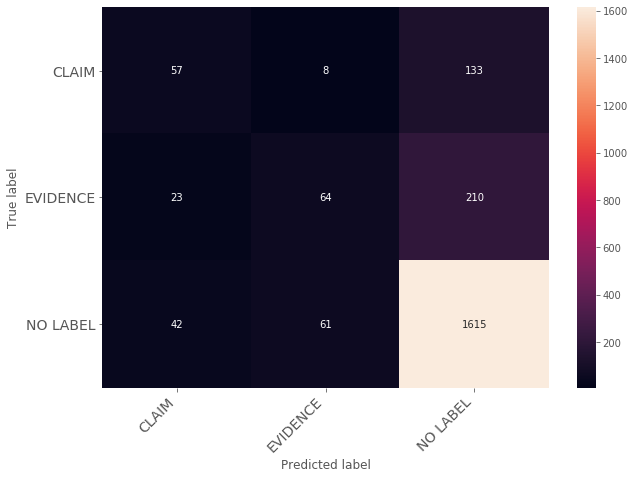

,CLAIM,EVIDENCE,NO LABEL
CLAIM,57,8,133
EVIDENCE,23,64,210
NO LABEL,42,61,1615


In [ ]:
# print confusion matrix 
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), 
                       y_pred=y_prediction2, 
                       class_names=class_names)
 

/Users/sils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



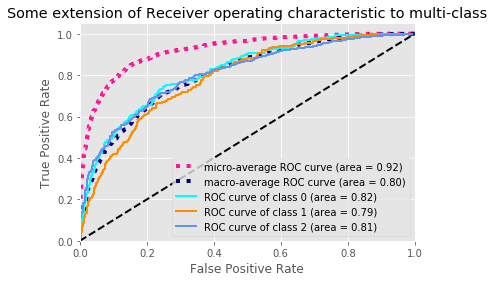

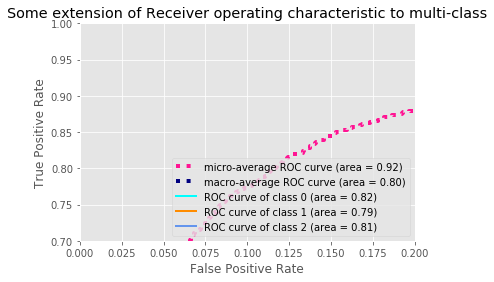

In [ ]:
y_prediction_prob2 =rnn_model_withdr1.predict(x_test2)

plot_multi_class_roc_auc_curves(nb_classes=3,
                              y_true=y_test_ar,
                             y_pred_score=y_prediction_prob2)

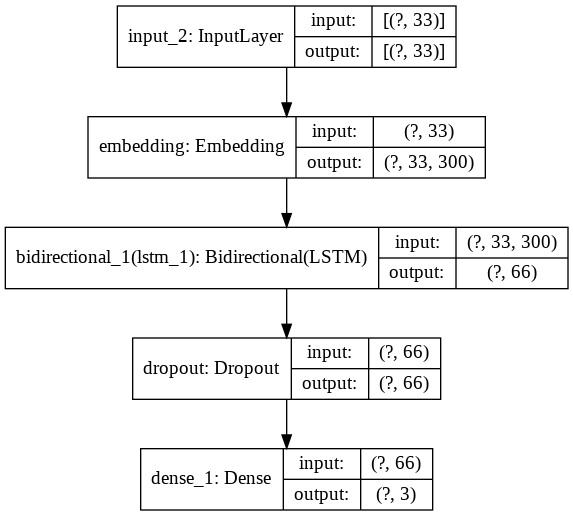

In [ ]:
plot_model(rnn_model_withdr1,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)


In [ ]:
# print classification report 
print(classification_report(y_test_ar.argmax(axis=1), y_prediction2, digits=4))

              precision    recall  f1-score   support

           0     0.4672    0.2879    0.3563       198
           1     0.4812    0.2155    0.2977       297
           2     0.8248    0.9400    0.8787      1718

    accuracy                         0.7845      2213
   macro avg     0.5911    0.4811    0.5109      2213
weighted avg     0.7467    0.7845    0.7540      2213



In [ ]:
# RNN model 2 with drop out rate 0.1
def build_model_withdr2(em,
                  max_len: int,
                  max_feats: int,
                  emb_dimensions: int,
                  n_outputs: int = 3):
    """

    :param max_len:
    :param max_feats:
    :param emb_dimensions:
    :param n_outputs:
    :return:
    """
    # this is the placeholder tensor for the input sequences
    sequence = Input(shape=(max_len,), dtype='int32')

    emb_layer = em
    embedded = emb_layer(sequence)

    lstm = Bidirectional(LSTM(33, return_sequences=False))(embedded)
    
    #adding drop out layer with 0.1 rate
    after_dp = Dropout(0.1)(lstm)
    

    output = Dense(n_outputs, activation='softmax')(after_dp)

    model = Model(inputs=[sequence], outputs=[output])

    # try using different optimizers and different optimizer configs
    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    return model

In [ ]:
rnn_model_withdr2 = build_model_withdr2(em,max_len=maxlen, max_feats=max_words, emb_dimensions=33)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 33)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 66)                88176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 201       
Total params: 2,338,377
Trainable params: 88,377
Non-trainable params: 2,250,000
_________________________________________________________________
None


In [ ]:
# train/fit RNN model with 0.1 drop out rate
#### with 60 epochs and batch size 256 ####
rnn_model_withdr2.fit(x_train2, y_train_ar,
                    epochs=60,
                    batch_size=256,
                    validation_data=(x_test2, y_test_ar),callbacks=es)

Epoch 1/60
35/35 [==============================] - 7s 188ms/step - loss: 0.6849 - accuracy: 0.7582 - val_loss: 0.6407 - val_accuracy: 0.7732
Epoch 2/60
35/35 [==============================] - 8s 221ms/step - loss: 0.6257 - accuracy: 0.7764 - val_loss: 0.6124 - val_accuracy: 0.7736
Epoch 3/60
35/35 [==============================] - 6s 172ms/step - loss: 0.5873 - accuracy: 0.7800 - val_loss: 0.5838 - val_accuracy: 0.7777
Epoch 4/60
35/35 [==============================] - 6s 171ms/step - loss: 0.5466 - accuracy: 0.7861 - val_loss: 0.5605 - val_accuracy: 0.7826
Epoch 5/60
35/35 [==============================] - 6s 181ms/step - loss: 0.5140 - accuracy: 0.8006 - val_loss: 0.5468 - val_accuracy: 0.7894
Epoch 6/60
35/35 [==============================] - 6s 183ms/step - loss: 0.4870 - accuracy: 0.8115 - val_loss: 0.5532 - val_accuracy: 0.7912
Epoch 7/60
35/35 [==============================] - 7s 193ms/step - loss: 0.4682 - accuracy: 0.8171 - val_loss: 0.5477 - val_accuracy: 0.7867
Epoch 

In [ ]:
# show predictions for the test dataset using RNN 2nd model with drop out rate 0.1
# with 60 epochs
y_prediction21 = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)
print(y_prediction21[0:100])

[2 2 2 2 2 2 1 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0]


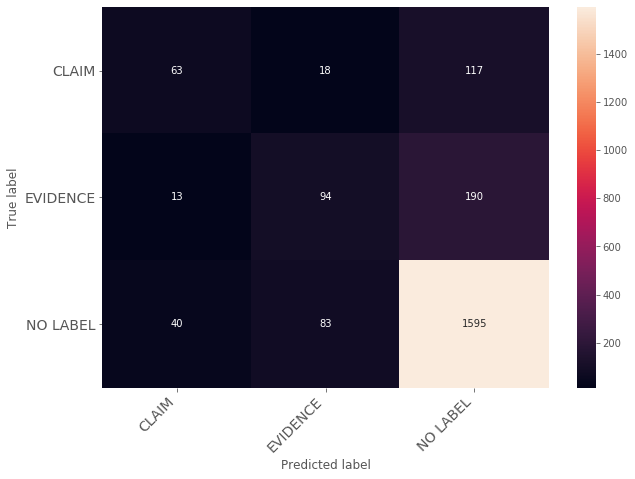

,CLAIM,EVIDENCE,NO LABEL
CLAIM,63,18,117
EVIDENCE,13,94,190
NO LABEL,40,83,1595


In [ ]:
# print confusion matrix 
print_confusion_matrix(y_true=y_test_ar.argmax(axis=1), 
                       y_pred=y_prediction21, 
                       class_names=class_names)

/Users/sils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



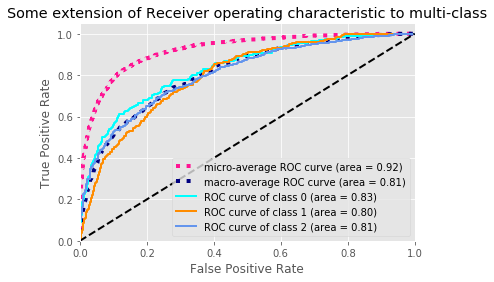

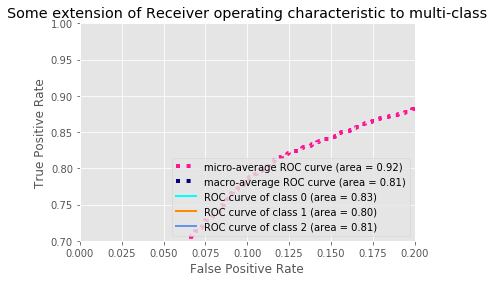

In [ ]:
y_prediction_prob21 =rnn_model_withdr2.predict(x_test2)

plot_multi_class_roc_auc_curves(nb_classes=3,
                              y_true=y_test_ar,
                             y_pred_score=y_prediction_prob21)

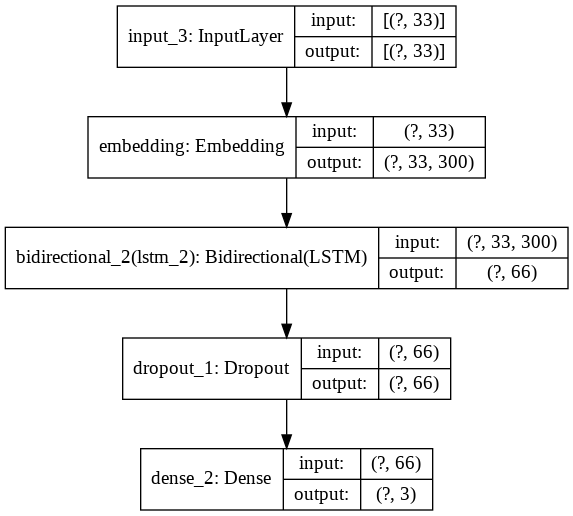

In [ ]:
plot_model(rnn_model_withdr2,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)

In [ ]:
# print classification report 
print(classification_report(y_test_ar.argmax(axis=1), y_prediction21, digits=4))

              precision    recall  f1-score   support

           0     0.5431    0.3182    0.4013       198
           1     0.4821    0.3165    0.3821       297
           2     0.8386    0.9284    0.8812      1718

    accuracy                         0.7917      2213
   macro avg     0.6212    0.5210    0.5549      2213
weighted avg     0.7643    0.7917    0.7713      2213



## Evaluation metrics for test dataset fort the RNN with the best accuracy

In [ ]:
# evaluation on test dataset
rnn_model_withdr2.evaluate(x_test2, y_test_ar, verbose=1)

70/70 [==============================] - 2s 31ms/step - loss: 0.5463 - accuracy: 0.7917


[0.5462672710418701, 0.7916855216026306]

In [ ]:
rnn_model_withdr2.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 33)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 66)                88176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 201       
Total params: 2,338,377
Trainable params: 88,377
Non-trainable params: 2,250,000
_________________________________________________________________


## Weights Calculation for RNN 

In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(np.ravel(y_train_new,order='C')), class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y_train_new,order='C')),
                                                 np.ravel(y_train_new,order='C')))) 
class_weights

{0: 3.7251683501683504, 1: 2.4813568825343424, 2: 0.4294517224648229}

In [ ]:
print(sort_dict)

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]


## Check point with initial weights

In [ ]:
# To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.
import os
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
rnn_model_withdr2.save_weights(initial_weights)

<h3> we chode the best RNN model: rnn_model_withdr2 </h3>
<h6> which is the one with the below characteristics: </h6>
<h6>0.1 drop out rate with 60 epochs and batch size 256
and apply the calculated weights to reevaluate it. </h6>

In [ ]:
rnn_model_withdr2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model_CNN.load_weights(initial_weights)

history_RNN = rnn_model_withdr2.fit(x_train2, y_train_ar, epochs=60, 
                            batch_size=256, verbose=1, class_weight=class_weights, 
                            validation_data=(x_test2, y_test_ar))

Epoch 1/60
35/35 [==============================] - 9s 267ms/step - loss: 0.6875 - accuracy: 0.7039 - val_loss: 0.8313 - val_accuracy: 0.6308
Epoch 2/60
35/35 [==============================] - 10s 275ms/step - loss: 0.6478 - accuracy: 0.7153 - val_loss: 0.7562 - val_accuracy: 0.6737
Epoch 3/60
35/35 [==============================] - 6s 175ms/step - loss: 0.6143 - accuracy: 0.7297 - val_loss: 0.7949 - val_accuracy: 0.6615
Epoch 4/60
35/35 [==============================] - 8s 240ms/step - loss: 0.5772 - accuracy: 0.7475 - val_loss: 0.7881 - val_accuracy: 0.6652
Epoch 5/60
35/35 [==============================] - 9s 246ms/step - loss: 0.5495 - accuracy: 0.7540 - val_loss: 0.8057 - val_accuracy: 0.6539
Epoch 6/60
35/35 [==============================] - 7s 212ms/step - loss: 0.5262 - accuracy: 0.7595 - val_loss: 0.7677 - val_accuracy: 0.6837
Epoch 7/60
35/35 [==============================] - 6s 175ms/step - loss: 0.4882 - accuracy: 0.7795 - val_loss: 0.8230 - val_accuracy: 0.6588
Epoch

35/35 [==============================] - 6s 160ms/step - loss: 0.0463 - accuracy: 0.9784 - val_loss: 1.3359 - val_accuracy: 0.7375
Epoch 59/60
35/35 [==============================] - 6s 158ms/step - loss: 0.0302 - accuracy: 0.9886 - val_loss: 1.4090 - val_accuracy: 0.7465
Epoch 60/60
35/35 [==============================] - 6s 163ms/step - loss: 0.0251 - accuracy: 0.9911 - val_loss: 1.4160 - val_accuracy: 0.7393


In [ ]:
## RNN best model with class weights Evaluation 

In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_RNN = rnn_model_withdr2.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=256,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_RNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_RNN[1]*100))

9/9 [==============================] - 1s 76ms/step - loss: 1.4160 - accuracy: 0.7393

Test categorical_crossentropy: 1.416

Test accuracy: 73.9268 %


In [ ]:
### print classification report ##
y_pred_class_RNN = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_RNN, digits=4))

              precision    recall  f1-score   support

           0     0.3761    0.4141    0.3942       198
           1     0.3455    0.3502    0.3478       297
           2     0.8560    0.8440    0.8499      1718

    accuracy                         0.7393      2213
   macro avg     0.5259    0.5361    0.5307      2213
weighted avg     0.7445    0.7393    0.7418      2213



<h4> comparison with classification report without class weights </h4>

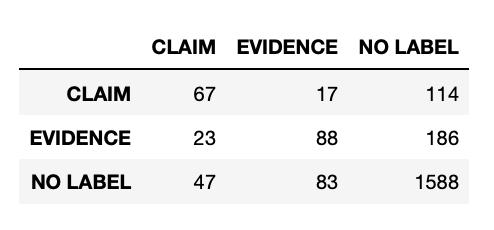

In [ ]:
conf_mat_RNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_RNN)
pd.DataFrame(conf_mat_RNN, columns = class_names, index=class_names)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,82,31,85
EVIDENCE,34,104,159
NO LABEL,102,166,1450


<h4> comparison with confusion matrix without class weights </h4>

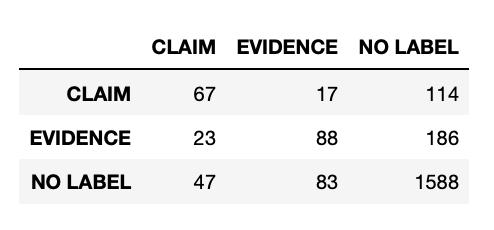

# -------------------------------------------------------------------

# Optimizers

## 1) Adam Optimizer (the baseline)

In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_RNN = rnn_model_withdr2.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=256,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_RNN_test[0]))
print('\nTest accuracy: {:.4f} %'.format(score_RNN_test[1]*100))

9/9 [==============================] - 1s 78ms/step - loss: 1.4160 - accuracy: 0.7393

Test categorical_crossentropy: 1.416

Test accuracy: 73.9268 %


In [ ]:
### print classification report ###
y_pred_class_RNN = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_RNN, digits=4))

              precision    recall  f1-score   support

           0     0.3761    0.4141    0.3942       198
           1     0.3455    0.3502    0.3478       297
           2     0.8560    0.8440    0.8499      1718

    accuracy                         0.7393      2213
   macro avg     0.5259    0.5361    0.5307      2213
weighted avg     0.7445    0.7393    0.7418      2213



In [ ]:
conf_mat_RNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_RNN)
pd.DataFrame(conf_mat_RNN, columns = class_names, index=class_names)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,82,31,85
EVIDENCE,34,104,159
NO LABEL,102,166,1450


# 2) Stochastic Gradient Descent (SGD) optimizer

In [ ]:
# pass optimizer by name: default parameters will be used
rnn_model_withdr2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# We train (fit our data to) our model
history_RNN2 = rnn_model_withdr2.fit(x_train2, y_train_ar, epochs=60, 
                            batch_size=256, verbose=1, class_weight=class_weights, 
                            validation_data=(x_test2, y_test_ar))

Epoch 1/60
35/35 [==============================] - 7s 209ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 1.4363 - val_accuracy: 0.7447
Epoch 2/60
35/35 [==============================] - 7s 199ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 1.4487 - val_accuracy: 0.7460
Epoch 3/60
35/35 [==============================] - 7s 208ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 1.4522 - val_accuracy: 0.7429
Epoch 4/60
35/35 [==============================] - 6s 174ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 1.4593 - val_accuracy: 0.7460
Epoch 5/60
35/35 [==============================] - 6s 181ms/step - loss: 0.0216 - accuracy: 0.9915 - val_loss: 1.4598 - val_accuracy: 0.7451
Epoch 6/60
35/35 [==============================] - 6s 177ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 1.4678 - val_accuracy: 0.7460
Epoch 7/60
35/35 [==============================] - 6s 175ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 1.4695 - val_accuracy: 0.7465
Epoch 

35/35 [==============================] - 6s 166ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 1.5771 - val_accuracy: 0.7479
Epoch 59/60
35/35 [==============================] - 6s 170ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 1.5715 - val_accuracy: 0.7456
Epoch 60/60
35/35 [==============================] - 6s 177ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 1.5689 - val_accuracy: 0.7451


In [ ]:
# Evaluate the trained model on the test set and store on score variable
score_RNN2 = rnn_model_withdr2.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=256,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_RNN2[0]))
print('\nTest accuracy: {:.4f} %'.format(score_RNN2[1]*100))

9/9 [==============================] - 1s 73ms/step - loss: 1.5689 - accuracy: 0.7451

Test categorical_crossentropy: 1.569

Test accuracy: 74.5142 %


In [ ]:
### build classification report ###
y_pred_class_RNN = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_RNN, digits=4))

              precision    recall  f1-score   support

           0     0.4000    0.3636    0.3810       198
           1     0.3465    0.3535    0.3500       297
           2     0.8509    0.8568    0.8538      1718

    accuracy                         0.7451      2213
   macro avg     0.5325    0.5247    0.5283      2213
weighted avg     0.7428    0.7451    0.7439      2213



In [ ]:
conf_mat_RNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_RNN)
pd.DataFrame(conf_mat_RNN, columns = class_names, index=class_names)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,72,32,94
EVIDENCE,28,105,164
NO LABEL,80,166,1472


The final results from the model using **Adam** and **SGD** optimizers are: 


|                |F1-scores (Adam) | F1-scores (SDG) | 
|----------------|-------| -------| 
| 0              | .3942 | .3810 |
| 1              | .3478 | .3500 |
| 2              | .8499 | .8538 |
|                                |
| accuracy       | .7393 | .7451 |
| weighted avg   | .7418 | .7439 |


We observe that the **SGD optimizer** has better results, due to better distribution (F1-scores) in the first two classes and bigger accuracy. So, this is the one we will use from now on.

## Learning Rates

Epoch 1/60
35/35 [==============================] - 8s 242ms/step - loss: 0.0656 - accuracy: 0.9695 - val_loss: 0.9859 - val_accuracy: 0.7361
Epoch 2/60
35/35 [==============================] - 8s 225ms/step - loss: 0.0636 - accuracy: 0.9697 - val_loss: 0.9869 - val_accuracy: 0.7379
Epoch 3/60
35/35 [==============================] - 9s 271ms/step - loss: 0.0612 - accuracy: 0.9725 - val_loss: 0.9879 - val_accuracy: 0.7397
Epoch 4/60
35/35 [==============================] - 8s 231ms/step - loss: 0.0615 - accuracy: 0.9737 - val_loss: 0.9889 - val_accuracy: 0.7384
Epoch 5/60
35/35 [==============================] - 7s 210ms/step - loss: 0.0627 - accuracy: 0.9746 - val_loss: 0.9904 - val_accuracy: 0.7388
Epoch 00005: early stopping


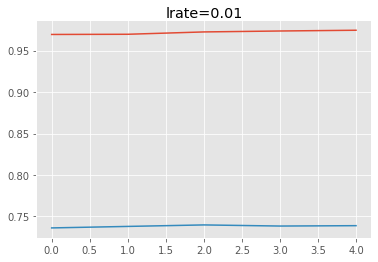

              precision    recall  f1-score   support

           0     0.3923    0.4141    0.4029       198
           1     0.3493    0.3939    0.3703       297
           2     0.8568    0.8324    0.8444      1718

    accuracy                         0.7361      2213
   macro avg     0.5328    0.5468    0.5392      2213
weighted avg     0.7471    0.7361    0.7413      2213

Epoch 1/60
35/35 [==============================] - 9s 260ms/step - loss: 0.0618 - accuracy: 0.9727 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 2/60
35/35 [==============================] - 8s 239ms/step - loss: 0.0641 - accuracy: 0.9695 - val_loss: 0.9861 - val_accuracy: 0.7366
Epoch 3/60
35/35 [==============================] - 9s 262ms/step - loss: 0.0641 - accuracy: 0.9692 - val_loss: 0.9862 - val_accuracy: 0.7366
Epoch 4/60
35/35 [==============================] - 10s 273ms/step - loss: 0.0625 - accuracy: 0.9716 - val_loss: 0.9863 - val_accuracy: 0.7370
Epoch 5/60
35/35 [==============================] 

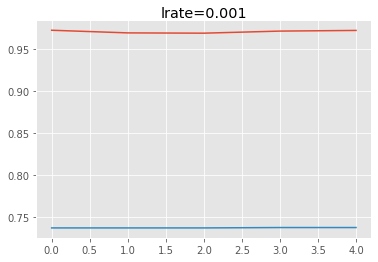

              precision    recall  f1-score   support

           0     0.3923    0.4141    0.4029       198
           1     0.3503    0.3939    0.3708       297
           2     0.8569    0.8329    0.8447      1718

    accuracy                         0.7366      2213
   macro avg     0.5332    0.5470    0.5395      2213
weighted avg     0.7473    0.7366    0.7416      2213

Epoch 1/60
35/35 [==============================] - 10s 273ms/step - loss: 0.0636 - accuracy: 0.9706 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 2/60
35/35 [==============================] - 7s 214ms/step - loss: 0.0631 - accuracy: 0.9730 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 3/60
35/35 [==============================] - 7s 191ms/step - loss: 0.0636 - accuracy: 0.9710 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 4/60
35/35 [==============================] - 7s 196ms/step - loss: 0.0615 - accuracy: 0.9723 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 5/60
35/35 [==============================] 

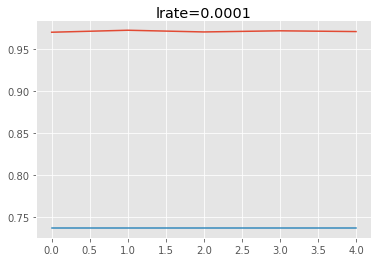

              precision    recall  f1-score   support

           0     0.3923    0.4141    0.4029       198
           1     0.3503    0.3939    0.3708       297
           2     0.8569    0.8329    0.8447      1718

    accuracy                         0.7366      2213
   macro avg     0.5332    0.5470    0.5395      2213
weighted avg     0.7473    0.7366    0.7416      2213

Epoch 1/60
35/35 [==============================] - 12s 342ms/step - loss: 0.0625 - accuracy: 0.9730 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 2/60
35/35 [==============================] - 6s 171ms/step - loss: 0.0615 - accuracy: 0.9713 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 3/60
35/35 [==============================] - 6s 164ms/step - loss: 0.0637 - accuracy: 0.9702 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 4/60
35/35 [==============================] - 7s 191ms/step - loss: 0.0626 - accuracy: 0.9719 - val_loss: 0.9860 - val_accuracy: 0.7366
Epoch 5/60
35/35 [==============================] 

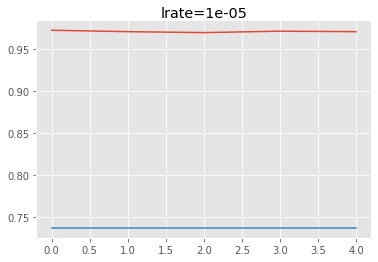

              precision    recall  f1-score   support

           0     0.3923    0.4141    0.4029       198
           1     0.3503    0.3939    0.3708       297
           2     0.8569    0.8329    0.8447      1718

    accuracy                         0.7366      2213
   macro avg     0.5332    0.5470    0.5395      2213
weighted avg     0.7473    0.7366    0.7416      2213



In [ ]:
from tensorflow import keras
from matplotlib import pyplot

learning_rate = [1e-2,1e-3,1e-4,1e-5]

 

for i in learning_rate:
    opt = keras.optimizers.SGD(learning_rate=i)  
    rnn_model_withdr2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

 

    history_RNN_LR = rnn_model_withdr2.fit(x_train2, y_train_ar, 
                                        epochs=60,
                                        batch_size=256, 
                                        verbose=1, 
                                        class_weight=class_weights,
                                        validation_data=(x_test2, y_test_ar),
                                        callbacks=[es])


    # plot learning curves
    pyplot.plot(history_RNN_LR.history['accuracy'], label='train')
    pyplot.plot(history_RNN_LR.history['val_accuracy'], label='test')
    # pyplot.yticks([])  # remove the ticks in the y-axis (for better representation)
    pyplot.title('lrate='+str(i), pad=-50)
    pyplot.show()
    
    
    ### build classification report ###
    y_pred_class_RNN = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)
    print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_RNN, digits=4))

## <center>Learning rates comparison</center>

The results from the above tests, are the following: 


|   f1-score     |lr = 1e-2 | lr = 1e-3 | lr = 1e-4 | lr = 1e-5 |
|----------------|----------| ----------| ----------| ----------| 
| 0              | .4029    | .4029     |  .4029    |  .4029    |
| 1              | .3703    | .3708     |  .3708    |  .3708    |
| 2              | .8444    | .8447     |  .8447    |  .8447    |
|                                                               |
| accuracy       |  .7361   |  .7366    |  .7366    |  .7366    | 
| weighted avg   |  .7413   |  .7416    |  .7416    |  .7416    | 



We observe that the accuracy in the test set increase as the learning rate drops.

Nevertheless we care more about the F1-scores in the first two classes, where the best results were achieved with **learning rate = 1e-3**. After that value, the scores remain almost stable. 
So, this is the one we will use from now on.

## Model with chosen optimizer and learning rate

In [ ]:
'''
We chose the rnn model with 
SGD Optimizer and learning rate: 1e-3

'''
opt = keras.optimizers.SGD(learning_rate=1e-3)  
rnn_model_withdr2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

 

history_RNN_chosenLR = rnn_model_withdr2.fit(x_train2, y_train_ar, 
                                        epochs=60,
                                        batch_size=256, 
                                        verbose=1, 
                                        class_weight=class_weights,
                                        validation_data=(x_test2, y_test_ar),
                                        callbacks=[es])


   

Epoch 1/60
35/35 [==============================] - 7s 190ms/step - loss: 0.0637 - accuracy: 0.9714 - val_loss: 0.9861 - val_accuracy: 0.7366
Epoch 2/60
35/35 [==============================] - 6s 178ms/step - loss: 0.0629 - accuracy: 0.9721 - val_loss: 0.9861 - val_accuracy: 0.7370
Epoch 3/60
35/35 [==============================] - 6s 171ms/step - loss: 0.0653 - accuracy: 0.9699 - val_loss: 0.9862 - val_accuracy: 0.7370
Epoch 4/60
35/35 [==============================] - 7s 203ms/step - loss: 0.0612 - accuracy: 0.9732 - val_loss: 0.9864 - val_accuracy: 0.7370
Epoch 5/60
35/35 [==============================] - 6s 163ms/step - loss: 0.0644 - accuracy: 0.9707 - val_loss: 0.9865 - val_accuracy: 0.7370
Epoch 00005: early stopping


In [ ]:
'''
Build classification report for rnn model with 
SGD Optimizer and learning rate: 1e-3

'''
y_pred_class_RNN = np.argmax(rnn_model_withdr2.predict(x_test2), axis=-1)

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class_RNN, digits=4))

              precision    recall  f1-score   support

           0     0.3942    0.4141    0.4039       198
           1     0.3503    0.3939    0.3708       297
           2     0.8564    0.8329    0.8445      1718

    accuracy                         0.7366      2213
   macro avg     0.5336    0.5470    0.5398      2213
weighted avg     0.7471    0.7366    0.7415      2213



In [ ]:
'''
Build confusion matrix report for rnn model with 
SGD Optimizer and learning rate: 1e-3

'''
conf_mat_RNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_RNN)
pd.DataFrame(conf_mat_RNN, columns = class_names, index=class_names)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,82,28,88
EVIDENCE,28,117,152
NO LABEL,98,189,1431


In [ ]:
n_classes = y.label.nunique()
print(n_classes)
print(y_train_ar.shape[1])

# print the number of total distinct classes
print(np.max(y_train_new)+1, 'classes')

3
3
3 classes


In [ ]:
y_score_RNN = rnn_model_withdr2.predict(x_test2)
y_score_RNN

array([[3.32836628e-01, 5.42725146e-01, 1.24438226e-01],
       [4.56336056e-06, 3.14064411e-04, 9.99681354e-01],
       [1.32370602e-07, 2.70269957e-05, 9.99972820e-01],
       ...,
       [1.08657127e-06, 2.43573508e-04, 9.99755323e-01],
       [2.11619010e-07, 1.45281711e-05, 9.99985218e-01],
       [2.94883270e-02, 1.04385139e-02, 9.60073233e-01]], dtype=float32)

In [ ]:
y_test_ar

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

/Users/sils/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



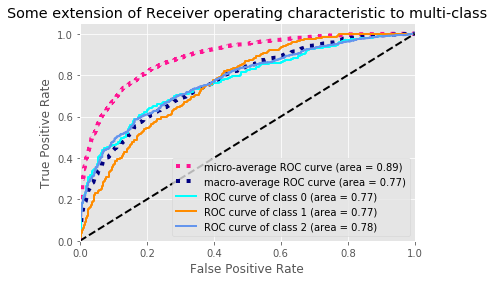

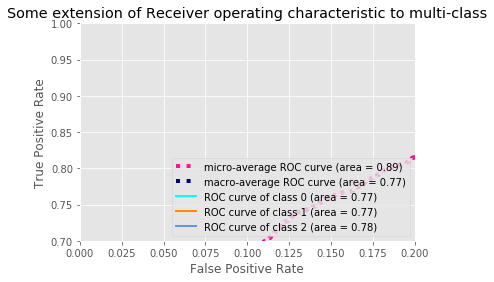

In [ ]:
plot_multi_class_roc_auc_curves(nb_classes=n_classes,
                                y_true=y_test_ar,
                                y_pred_score=y_score_RNN)

In [ ]:
rnn_model_withdr2.save("rnn_model_withdr2.h5")